In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
import os
from glob import glob

In [2]:
# get the data
dfs = []
for f in glob('../analysis/map_to_model/auto-drrafter_*_scores.csv'):
    # ignore poorly fitting models
    if not (('BtCoV-HKU5' in f and 'eternafold' in f) or ('BtCoV-HKU5_conf4' in f and 'libraryDMS' in f)):
        df = pd.read_csv(f)
        df['source'] = f
        dfs.append(df)
dfs = pd.concat(dfs).reset_index()
dfs[['pdb','emmap', 'source','q','clashscore','bond_outlier','angle_outlier','pucker_outlier','suite_outlier','avg_suitness','cc_volume', 'cc_mask', 'cc_peaks','tempy_mi','tempy_smoc']].to_csv('../data/all_scores.csv') # 

In [3]:
df = pd.read_csv('../data/all_scores.csv')
sources = df.source.to_list()
df.source.nunique()

77

In [4]:
#we need to add more columns to the original dataframe 
#let's add: 
    #1 -- autodrrafter only or autodrrafter + erraser 
    #2 -- species 
    #3 -- conformation 
    #4 -- secstruct source

modeling_methods = []
species = []
confs = []
secstruct_sources = []
for item in sources:
    description = item.split('/')[3]
    description_split = description.split('_')
    modeling_methods.append(description_split[0]+'_'+description_split[1])
    species.append(description_split[2])
    
    #now to add list of conformations
    if len(description_split) == 6 or len(description_split) == 7:
        if description_split[2] == 'SARS-CoV-2':
            if len(description_split) == 6:
                confs.append(description_split[3])
            else:
                confs.append('nan')
        elif description_split[2] == 'HCoV-229E':
            confs.append(description_split[-2])
        else:
            confs.append(description_split[3])
    else:
        confs.append('nan')
        
    # now to add list of secstruct source types
    if len(description_split) == 6:
        if description_split[2] == 'HCoV-229E':
            secstruct_sources.append(description_split[3])
        else:
            secstruct_sources.append(description_split[4])
    elif len(description_split) == 7:
        if description_split[2] == 'SARS-CoV-2':
            secstruct_sources.append(description_split[3]+'_'+description_split[4]+'_'+description_split[5])
        elif description_split[2] == 'HCoV-229E':
            secstruct_sources.append(description_split[3]+'_'+description_split[4])
        else:
            secstruct_sources.append(description_split[4]+'_'+description_split[5])
    else:
        secstruct_sources.append(description_split[3])

In [5]:
df['modeling_method'] = modeling_methods
df['species'] = species
df['conf'] = confs
df['secstruct_source'] = secstruct_sources

df.head()

Unnamed: 0                                                pdb  \
0           0  BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3....   
1           1  BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3....   
2           2  BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3....   
3           3  BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3....   
4           4  BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3....   

                                               emmap  \
0  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...   
1  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...   
2  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...   
3  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...   
4  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...   

                                              source         q  clashscore  \
0  ../analysis/map_to_model/auto-drrafter_only_Bt...  0.168492        8.56   
1  ../analysis/map_to_model/auto-drrafter_only_Bt...  0.171930        6.71   
2  ../analysis/map_to_model/auto-drrafter_only_Bt...  0.171576        9.72   
3  ../analysis/map_to_model/auto-drrafter_only_Bt...  0.170073        5.09   
4  ../analysis/map_to_model/auto-drrafter_only_Bt...  0.170504        5.09   

   bond_outlier  angle_outlier  pucker_outlier  suite_outlier  avg_suitness  \
0           0.0       0.004728        0.044776       0.148148         0.759   
1           0.0       0.000000        0.022388       0.170370         0.765   
2           0.0       0.003715        0.044776       0.177778         0.757   
3           0.0       0.000338        0.007463       0.162963         0.735   
4           0.0       0.002026        0.014925       0.162963         0.775   

   cc_volume  cc_mask  cc_peaks  tempy_mi  tempy_smoc     modeling_method  \
0     0.3645   0.3439    0.3080  0.117674    0.867083  auto-drrafter_only   
1     0.3590   0.3365    0.3030  0.117965    0.868383  auto-drrafter_only   
2     0.3624   0.3371    0.3136  0.119124    0.874433  auto-drrafter_only   
3     0.3596   0.3391    0.3128  0.115996    0.868588  auto-drrafter_only   
4     0.3581   0.3334    0.3067  0.118289    0.870672  auto-drrafter_only   

      species   conf secstruct_source  
0  BtCoV-HKU5  conf4     librarySHAPE  
1  BtCoV-HKU5  conf4     librarySHAPE  
2  BtCoV-HKU5  conf4     librarySHAPE  
3  BtCoV-HKU5  conf4     librarySHAPE  
4  BtCoV-HKU5  conf4     librarySHAPE

In [6]:
df.modeling_method.unique()

array(['auto-drrafter_only', 'auto-drrafter_erraser'], dtype=object)

In [7]:
df.species.unique()

array(['BtCoV-HKU5', 'HCoV-229E', 'SARS-CoV-2', 'MERS', 'SARS-CoV-1'],
      dtype=object)

In [8]:
df.conf.unique()

array(['conf4', 'conf1', 'nan', 'SL56-5bext', 'conf3', 'conf2',
       'SL56-5cext', 'SL56', 'node1', 'node7'], dtype=object)

In [9]:
df.secstruct_source.unique()

array(['librarySHAPE', 'icSHAPE', 'manual', 'icSHAPE_eternafold',
       'libraryDMS', 'm2seq', 'rnastructure', 'eternafold',
       'm2seq_librarySHAPE_eternafold', 'reactivity_based'], dtype=object)

In [10]:
categories = df.columns.to_list()
categories = categories[4:-4]
print(categories)

# now to split into colors for different categories of scores
cat1 = ['clashscore', 'avg_suitness']
cat2 = ['q', 'cc_peaks', 'tempy_mi', 'tempy_smoc']

['q', 'clashscore', 'bond_outlier', 'angle_outlier', 'pucker_outlier', 'suite_outlier', 'avg_suitness', 'cc_volume', 'cc_mask', 'cc_peaks', 'tempy_mi', 'tempy_smoc']


## Percent Difference Plots

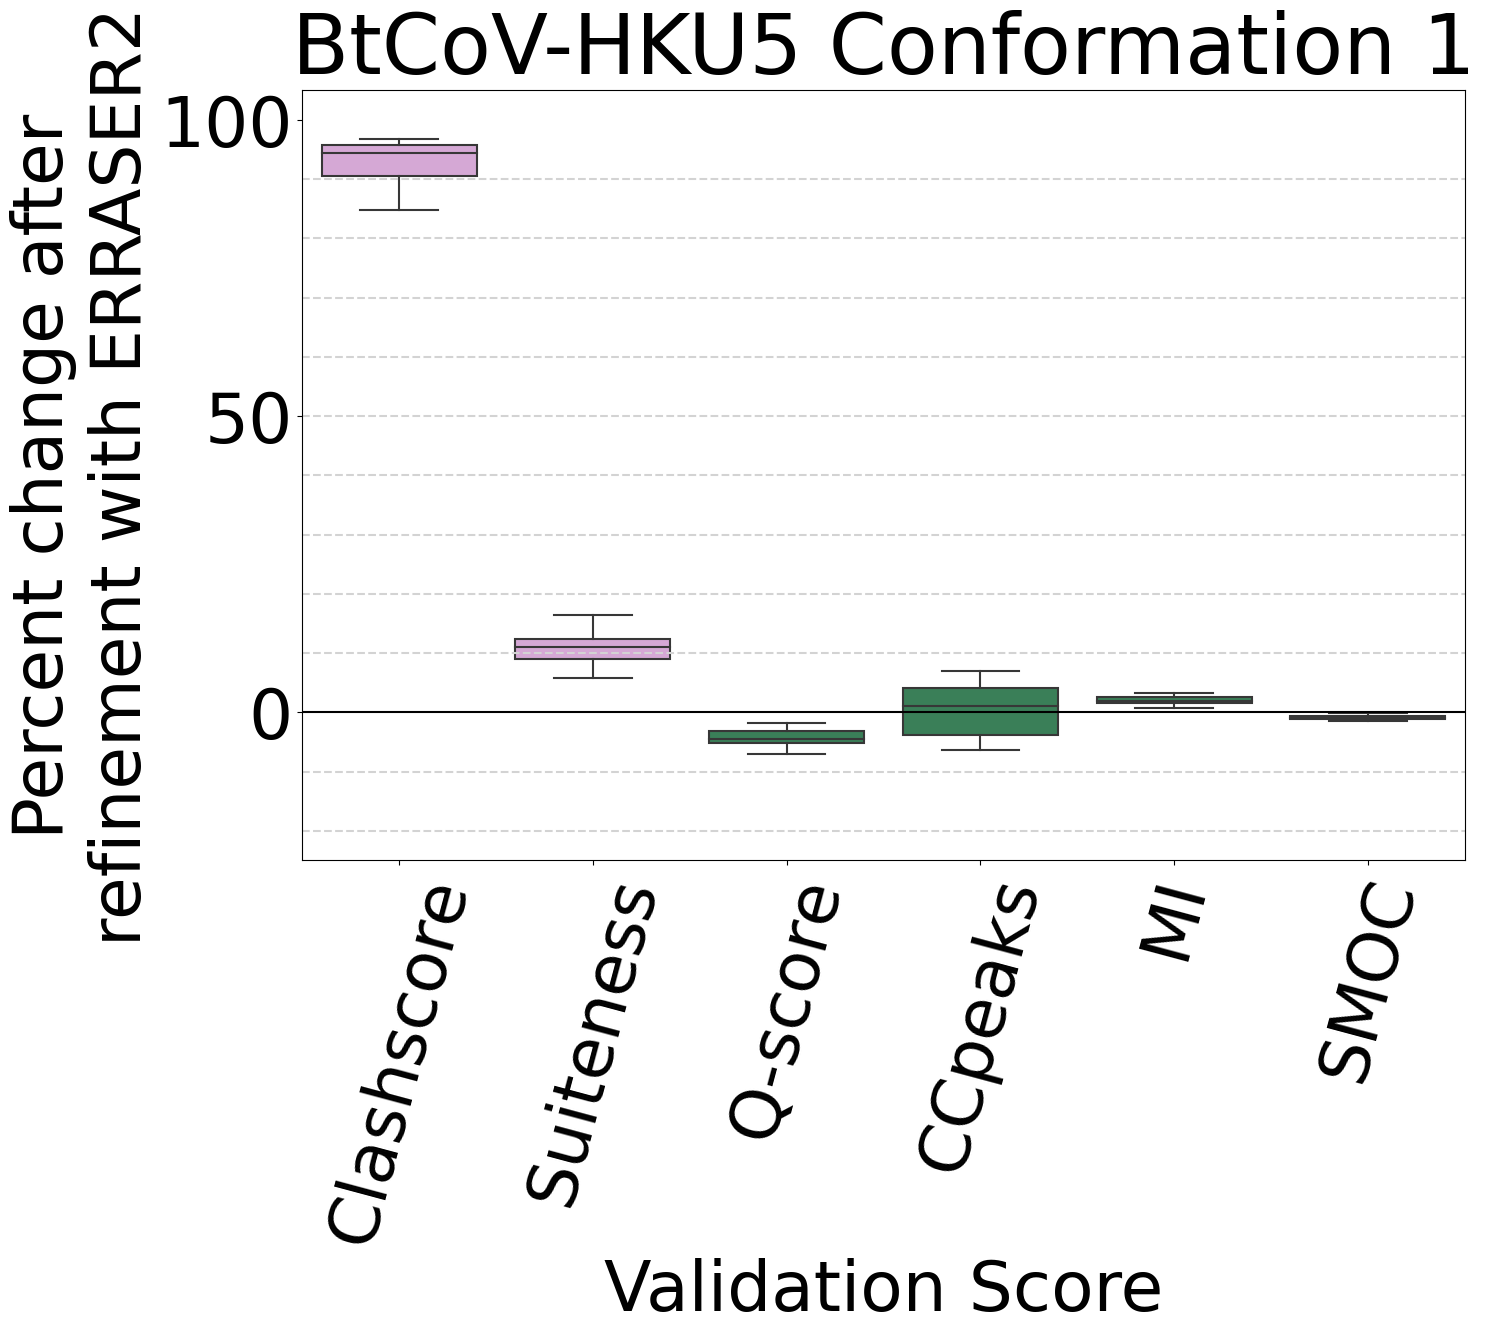

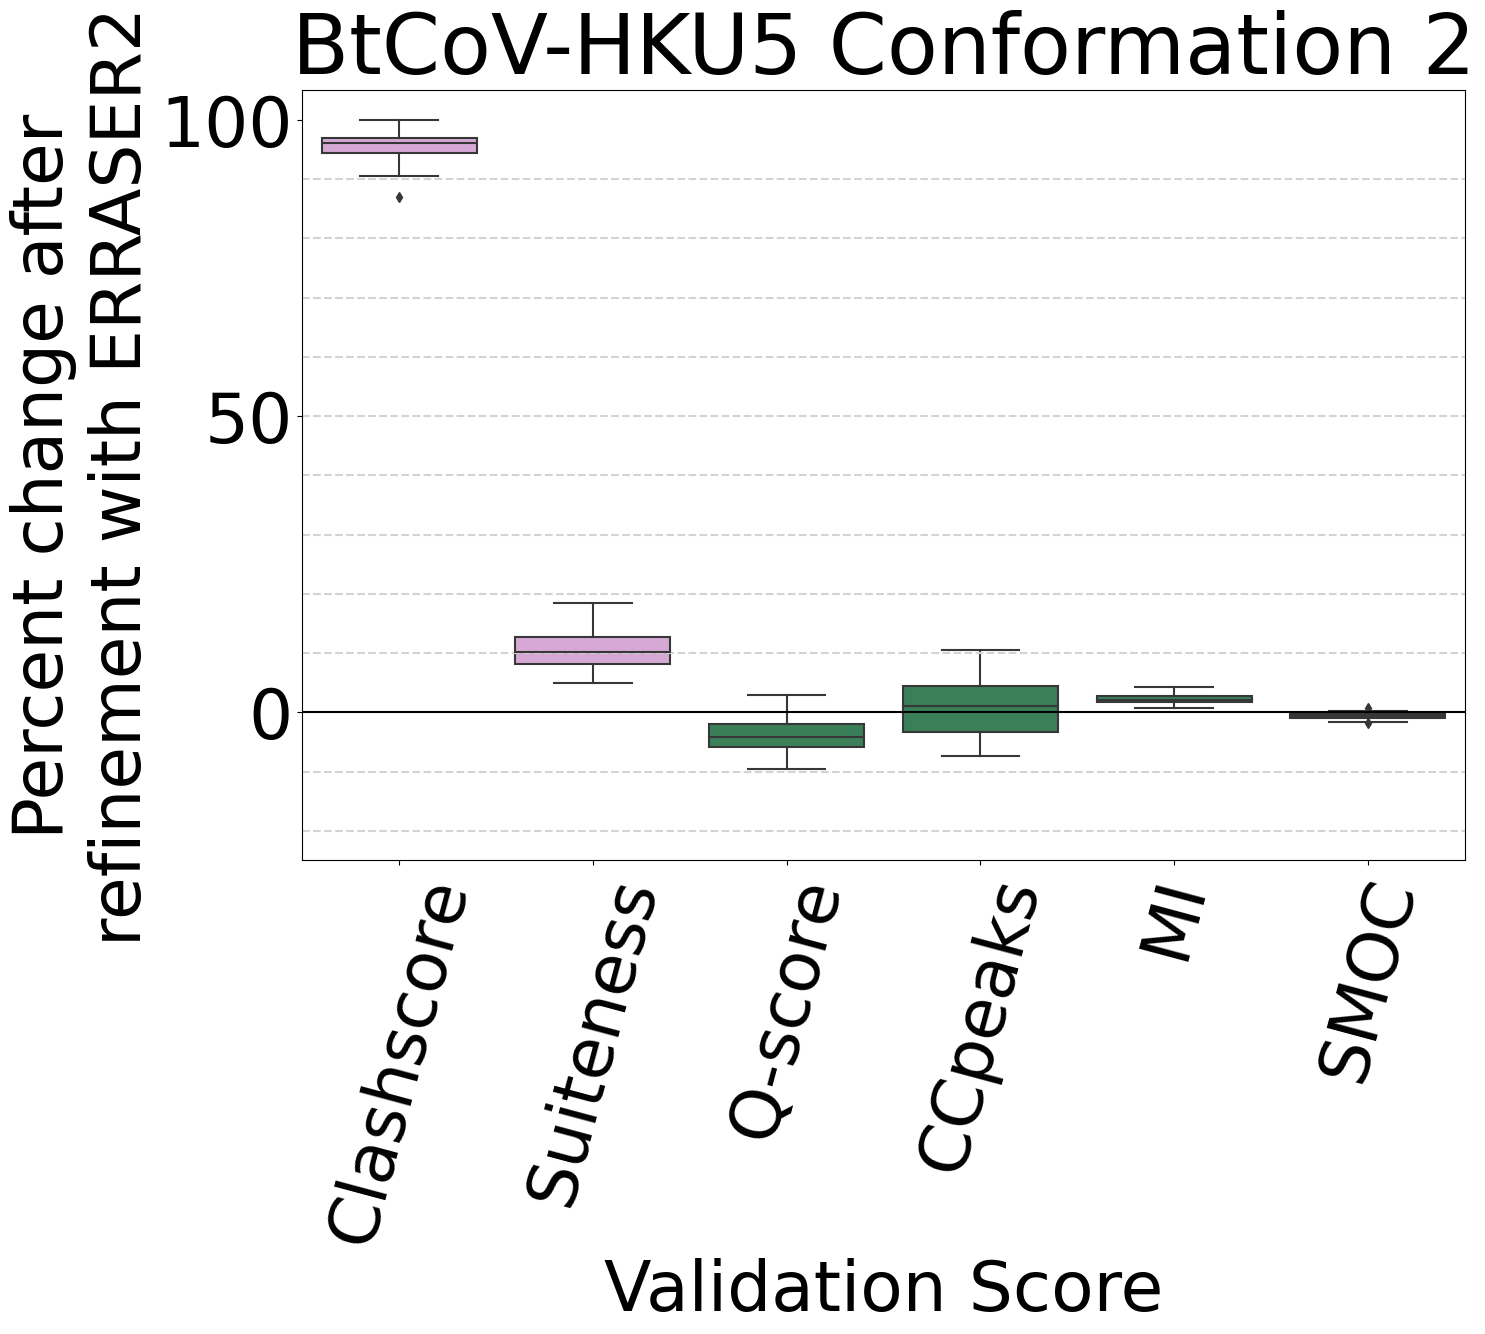

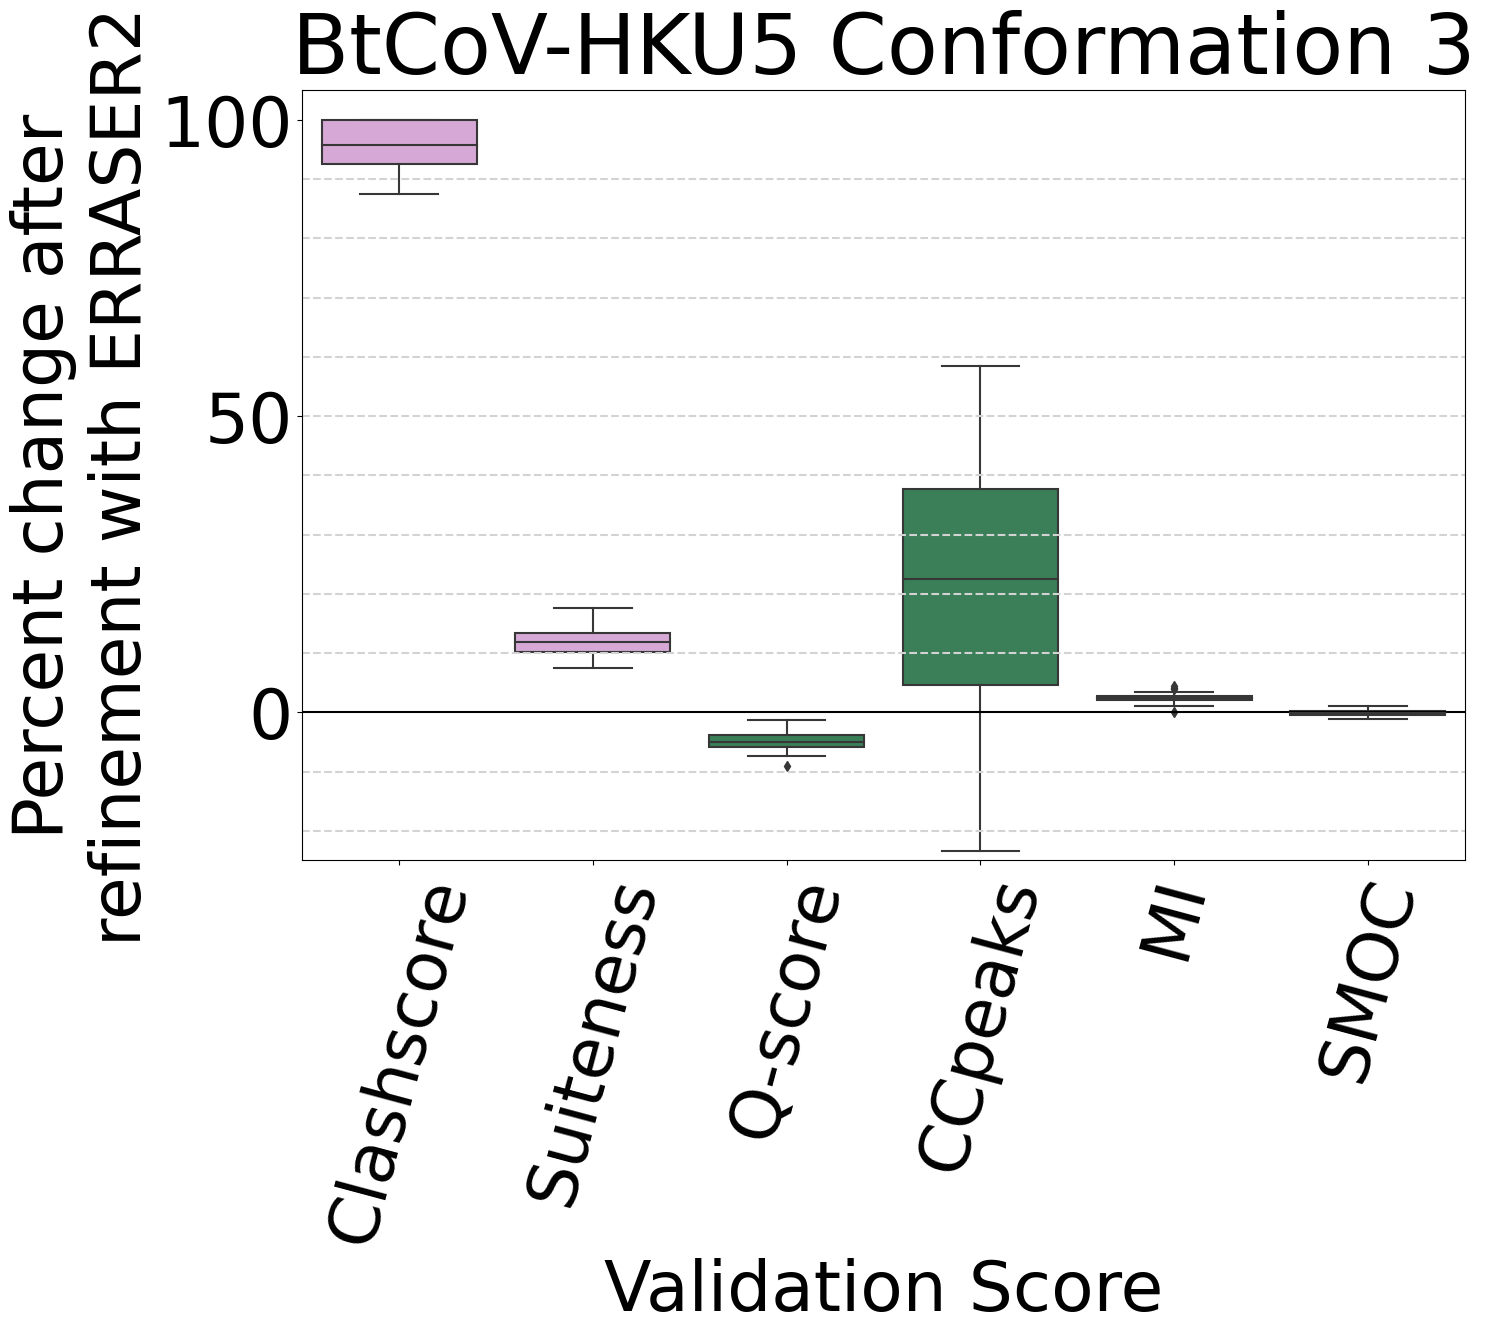

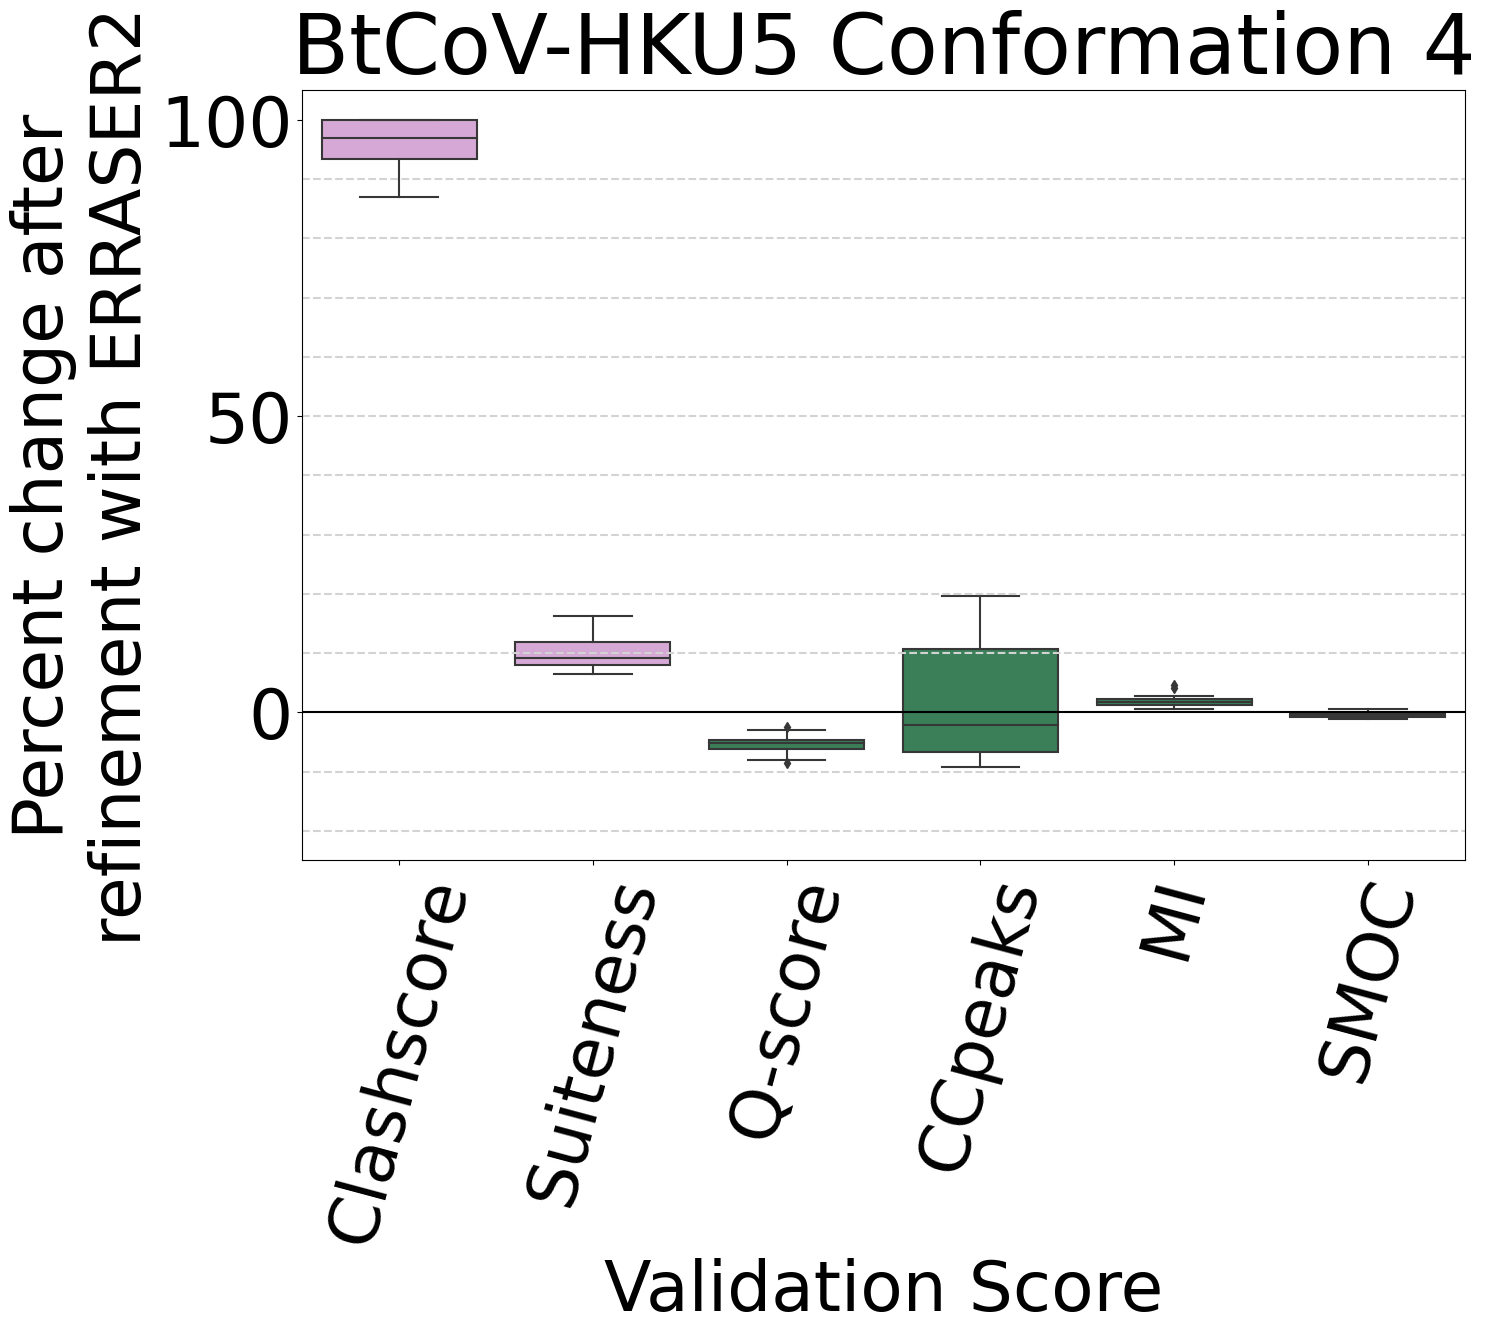

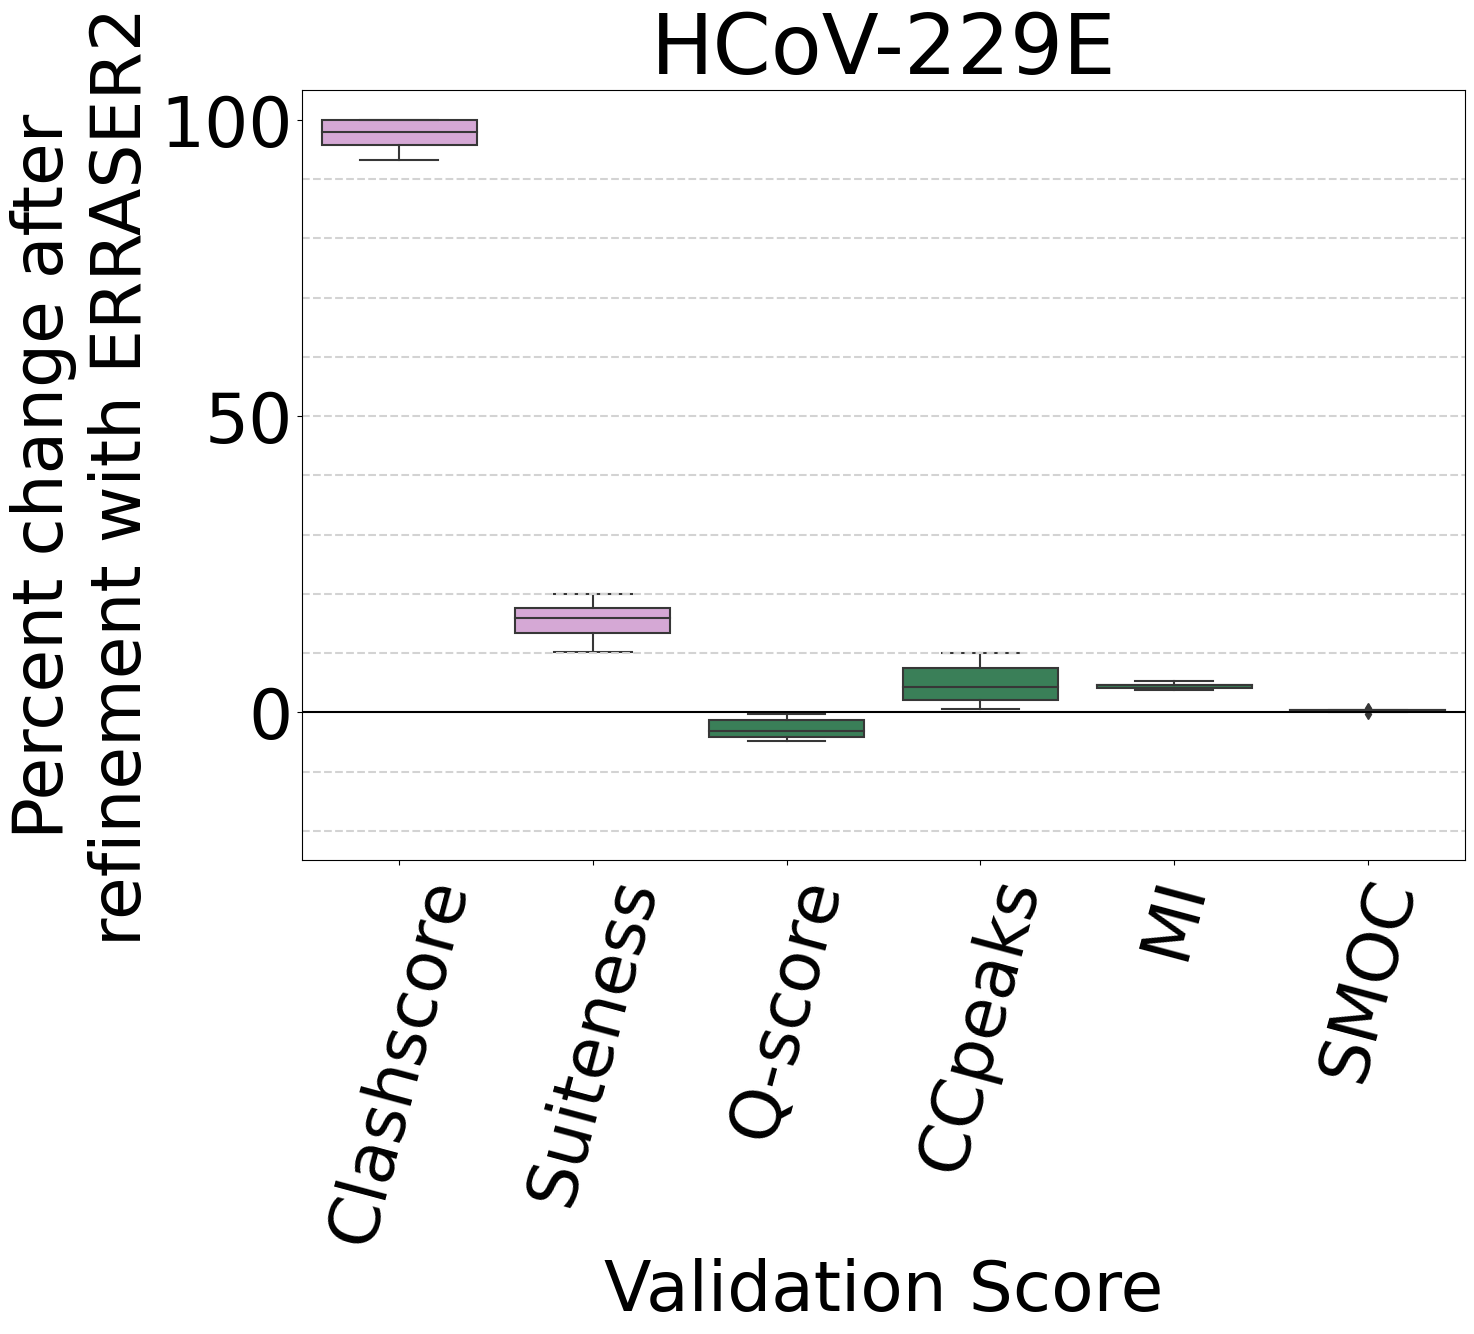

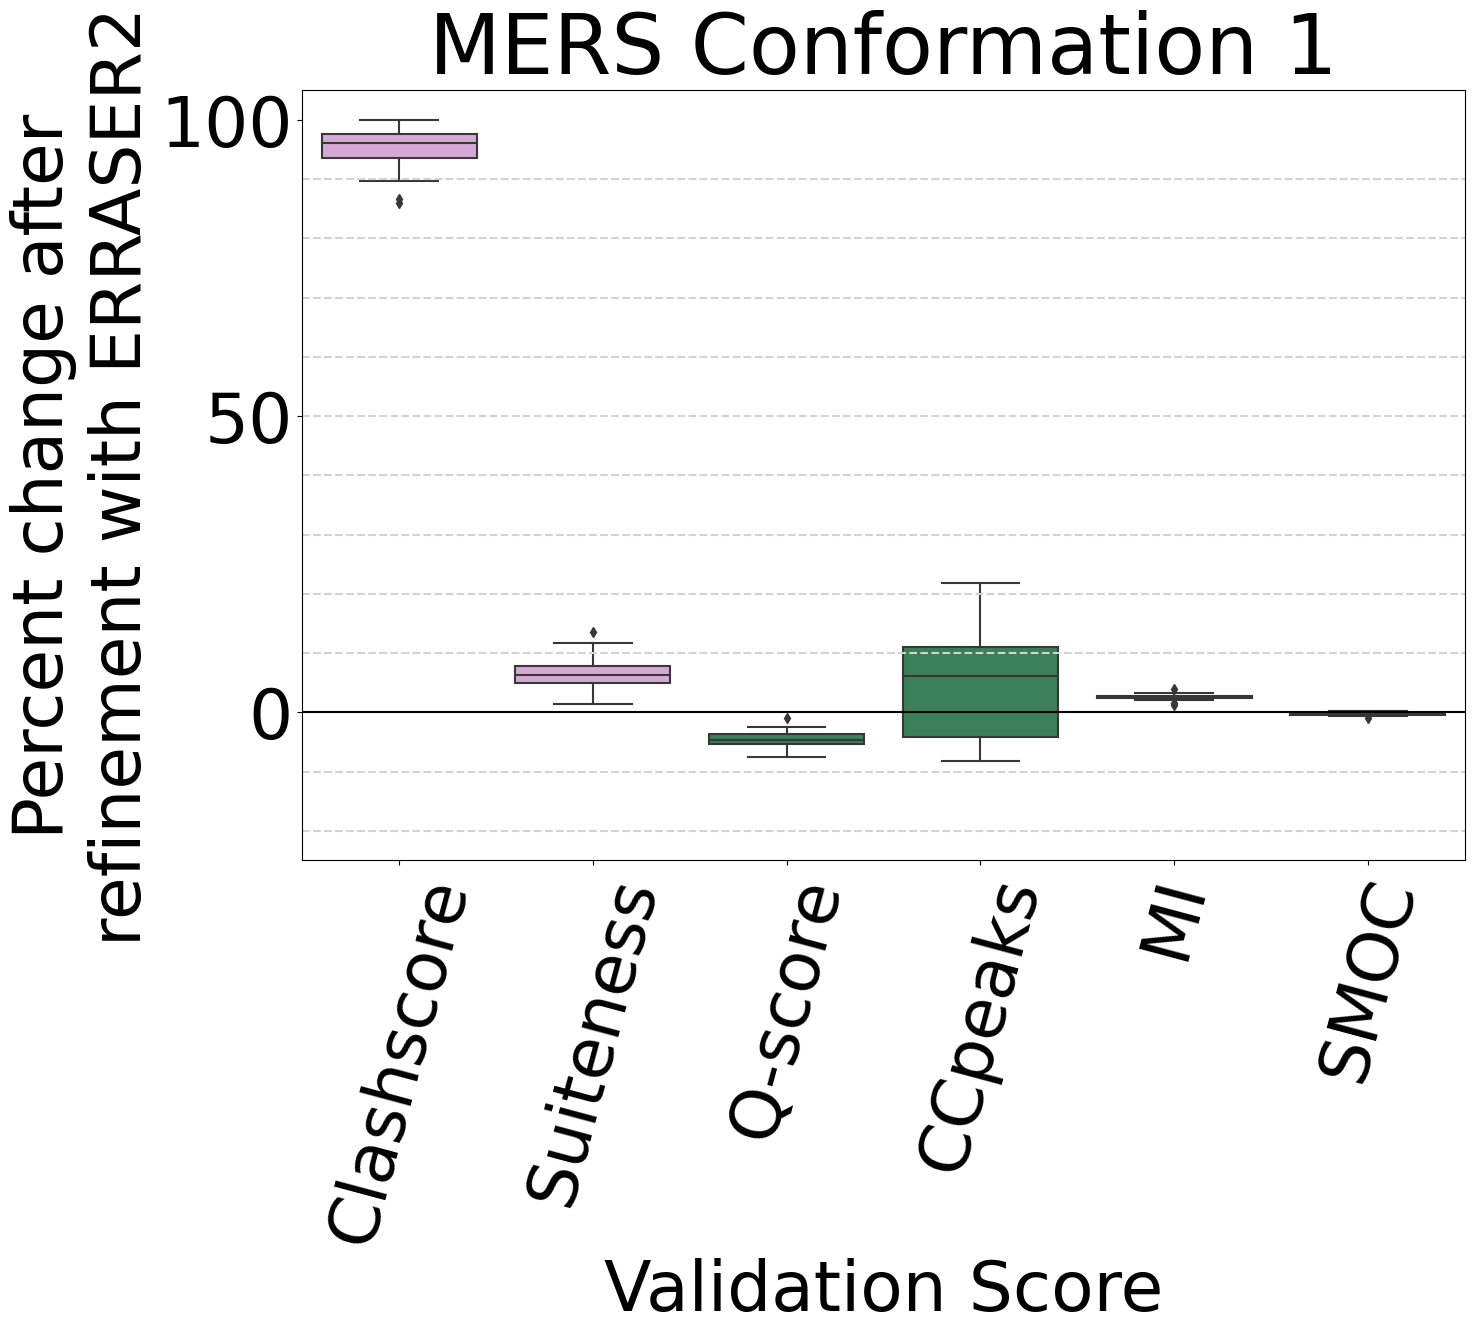

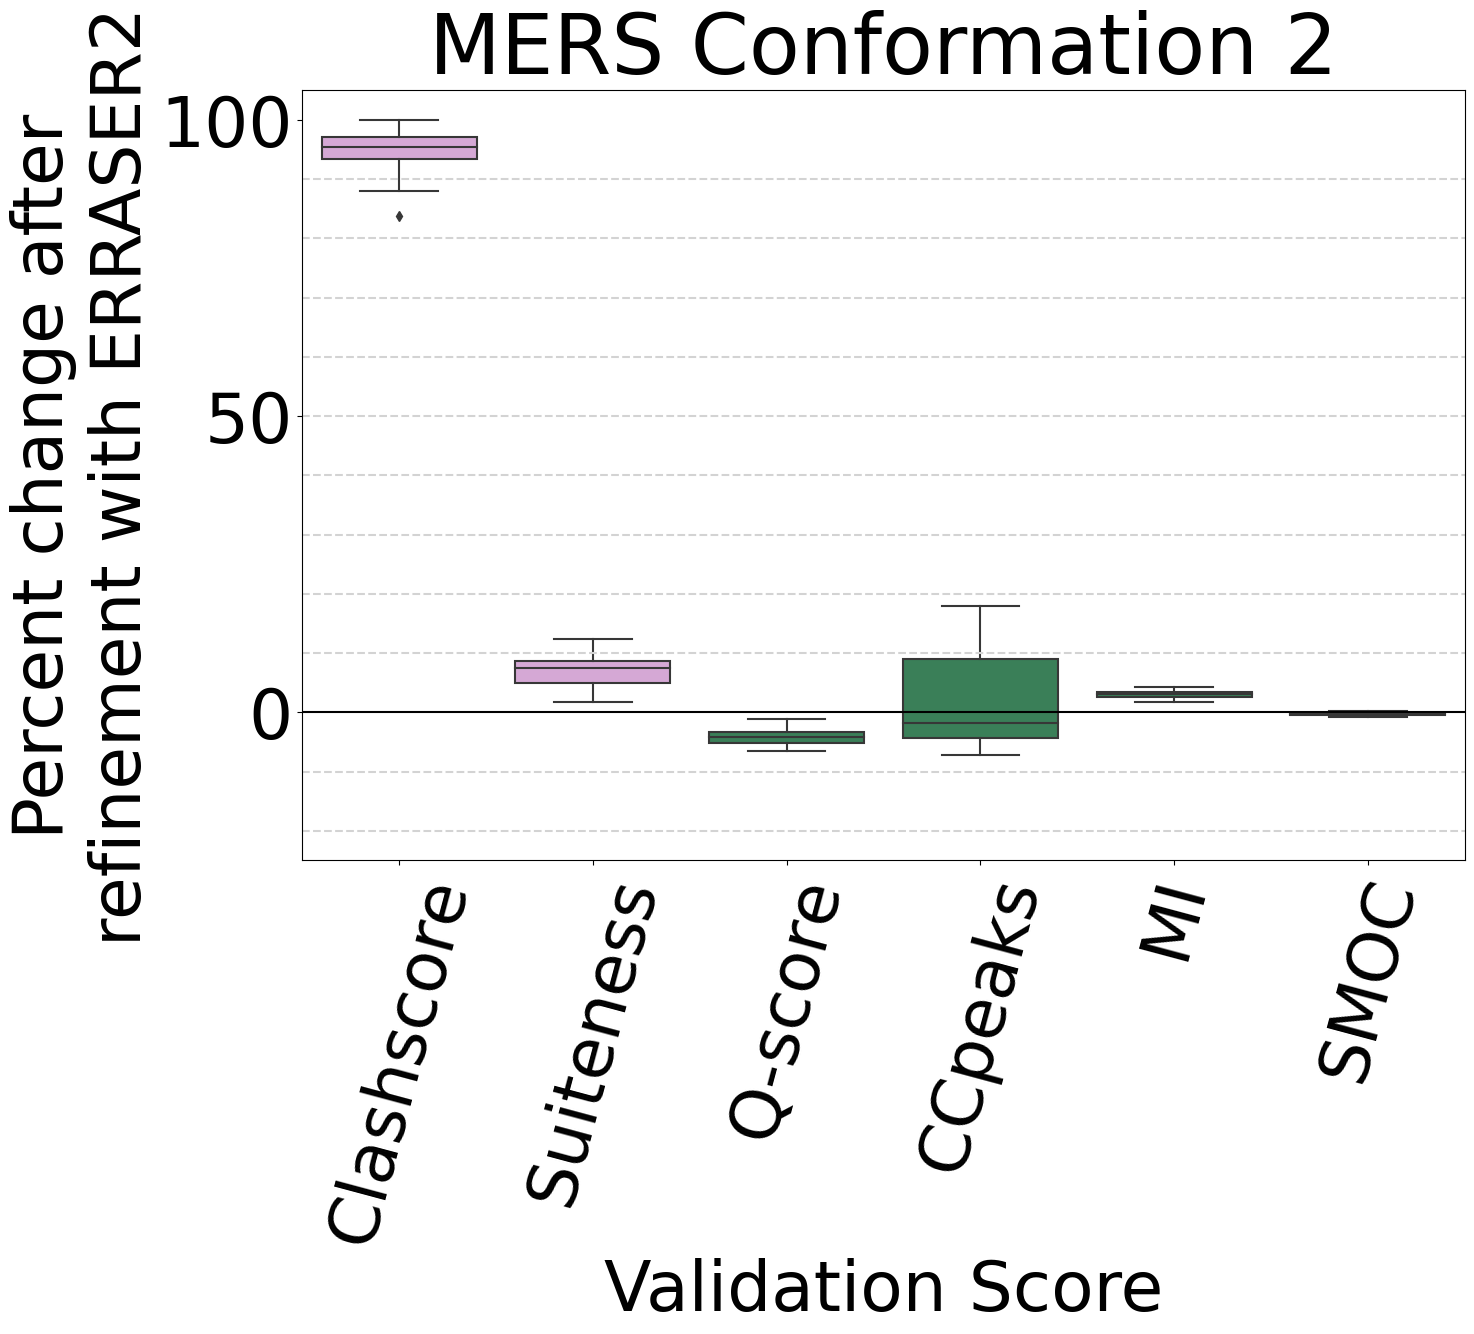

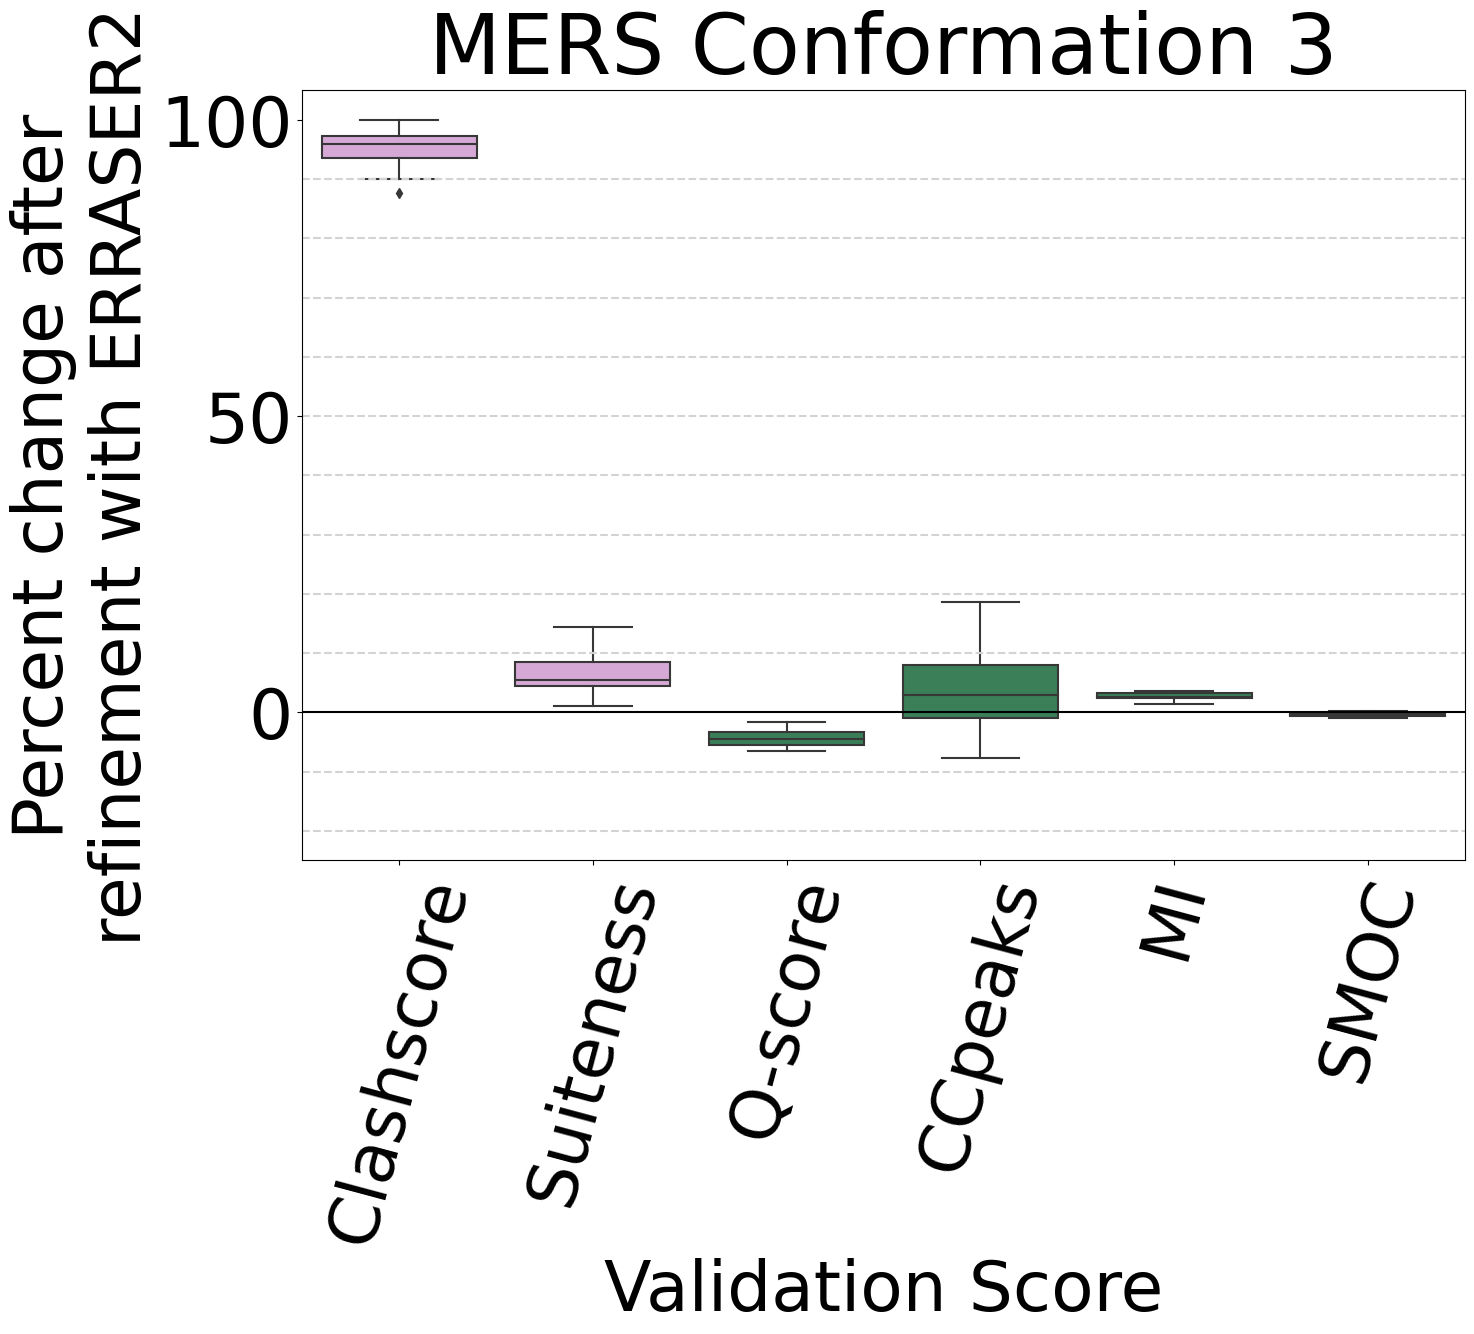

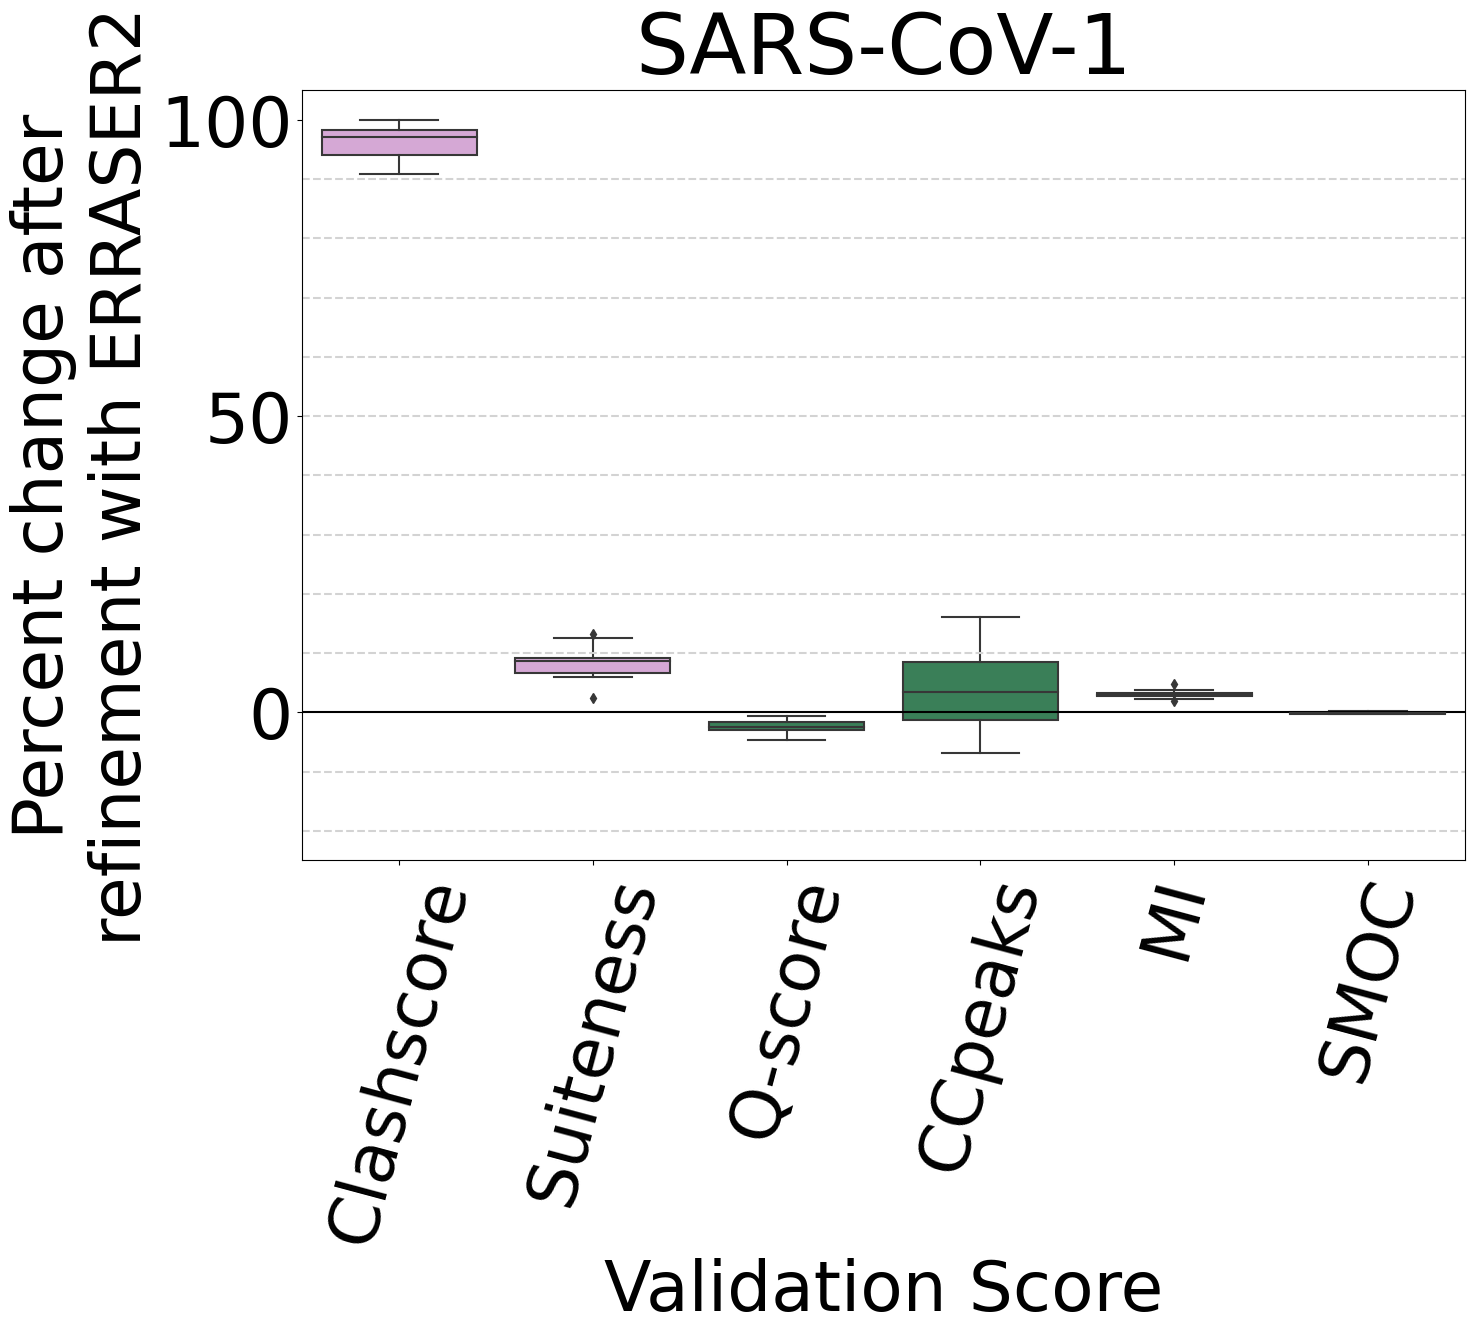

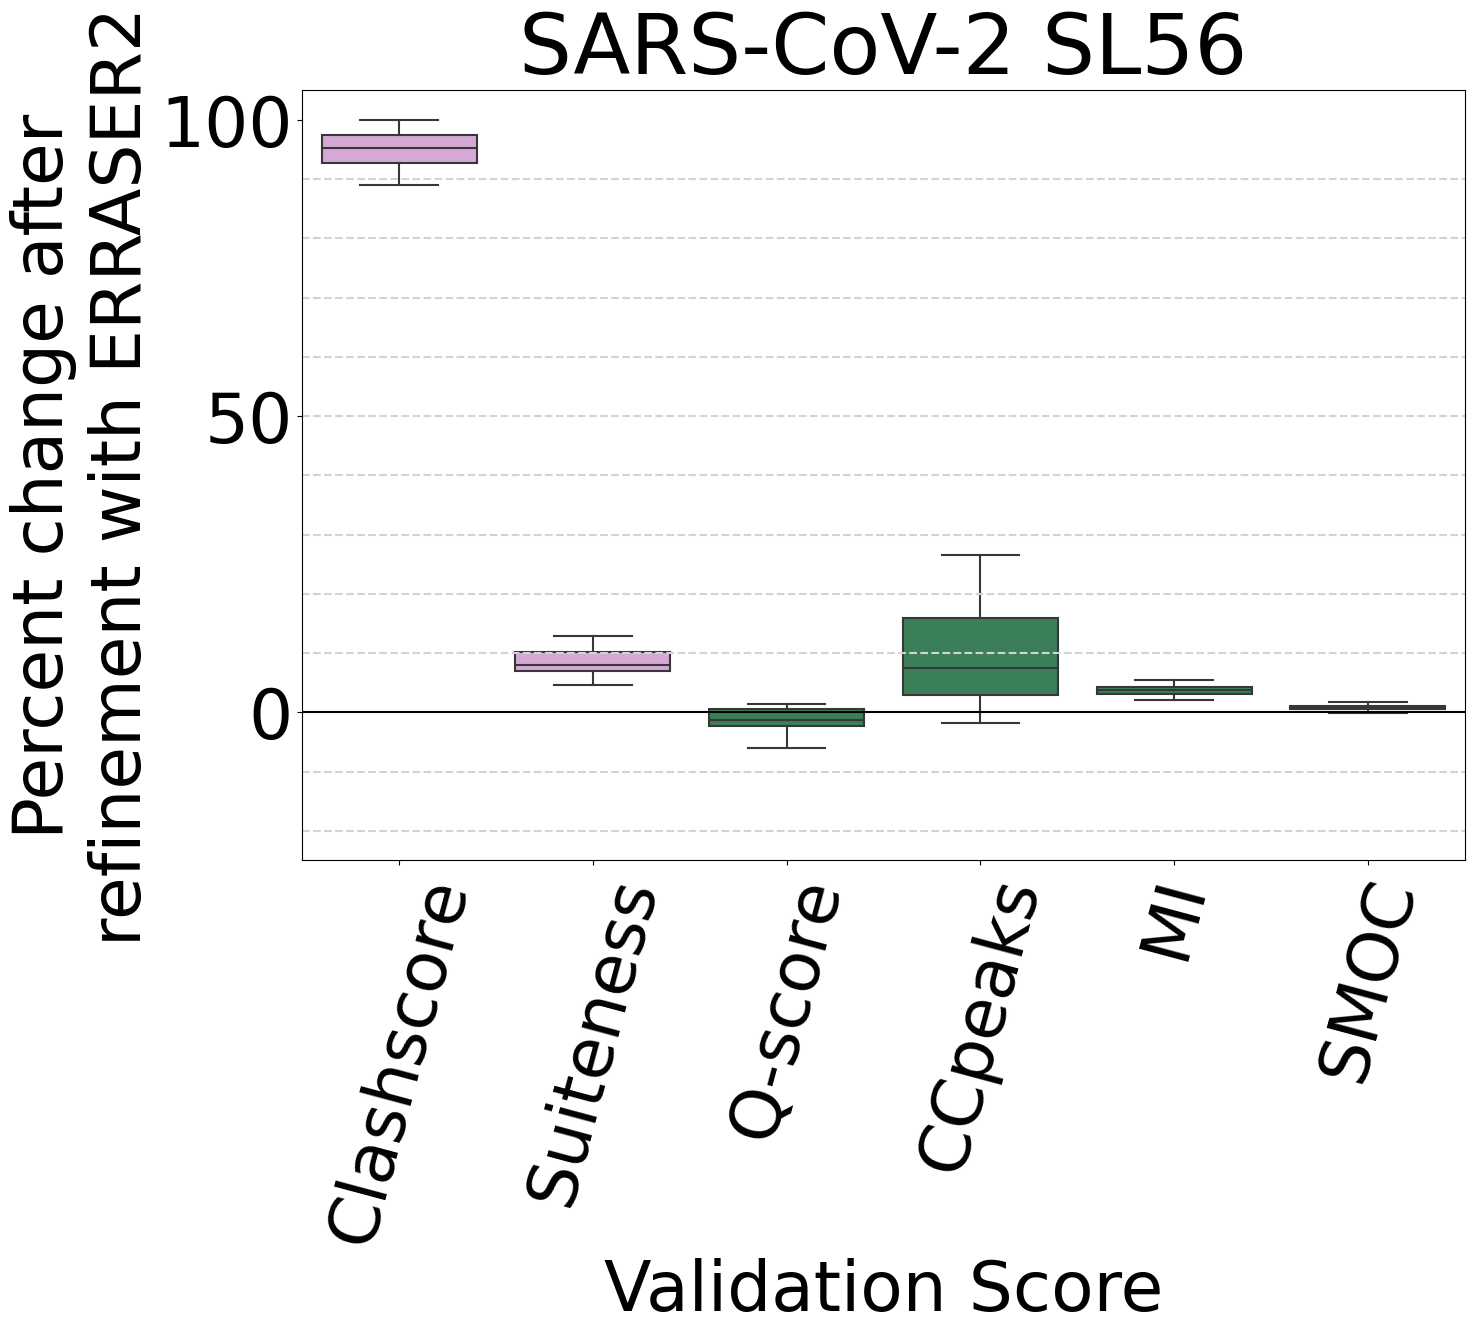

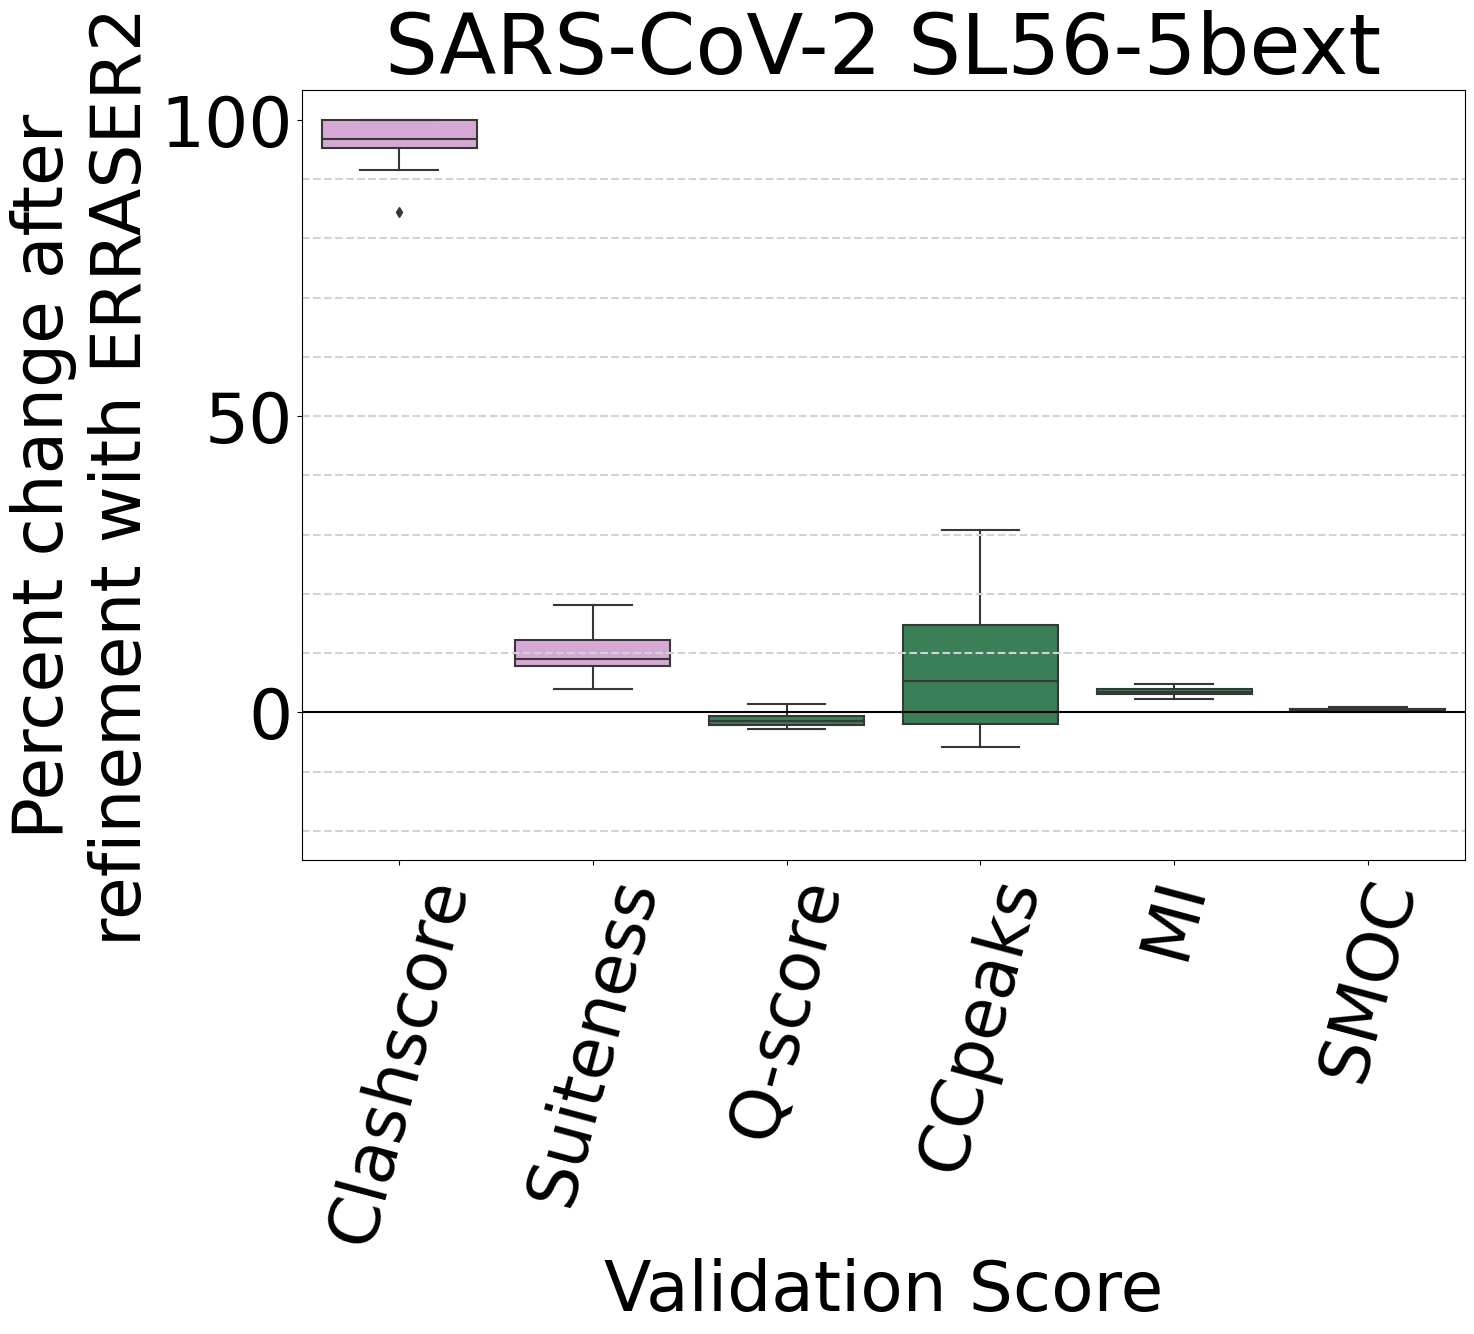

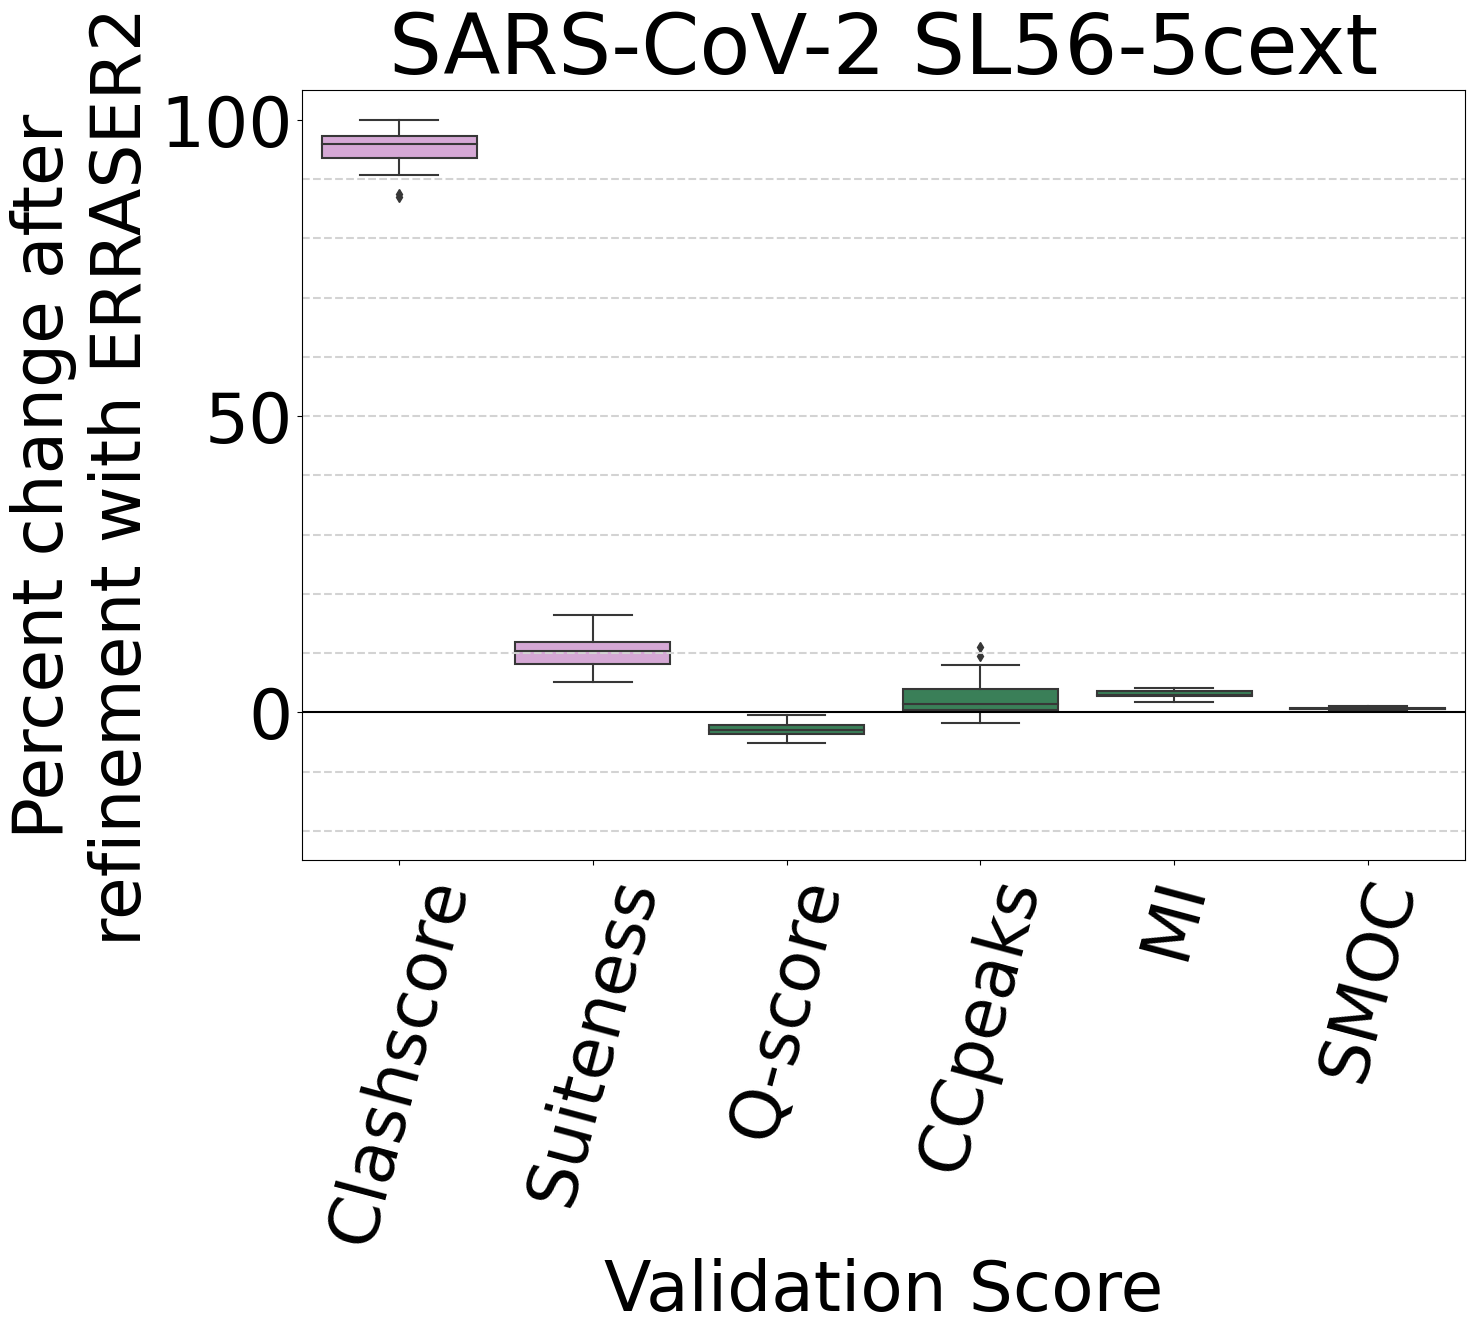

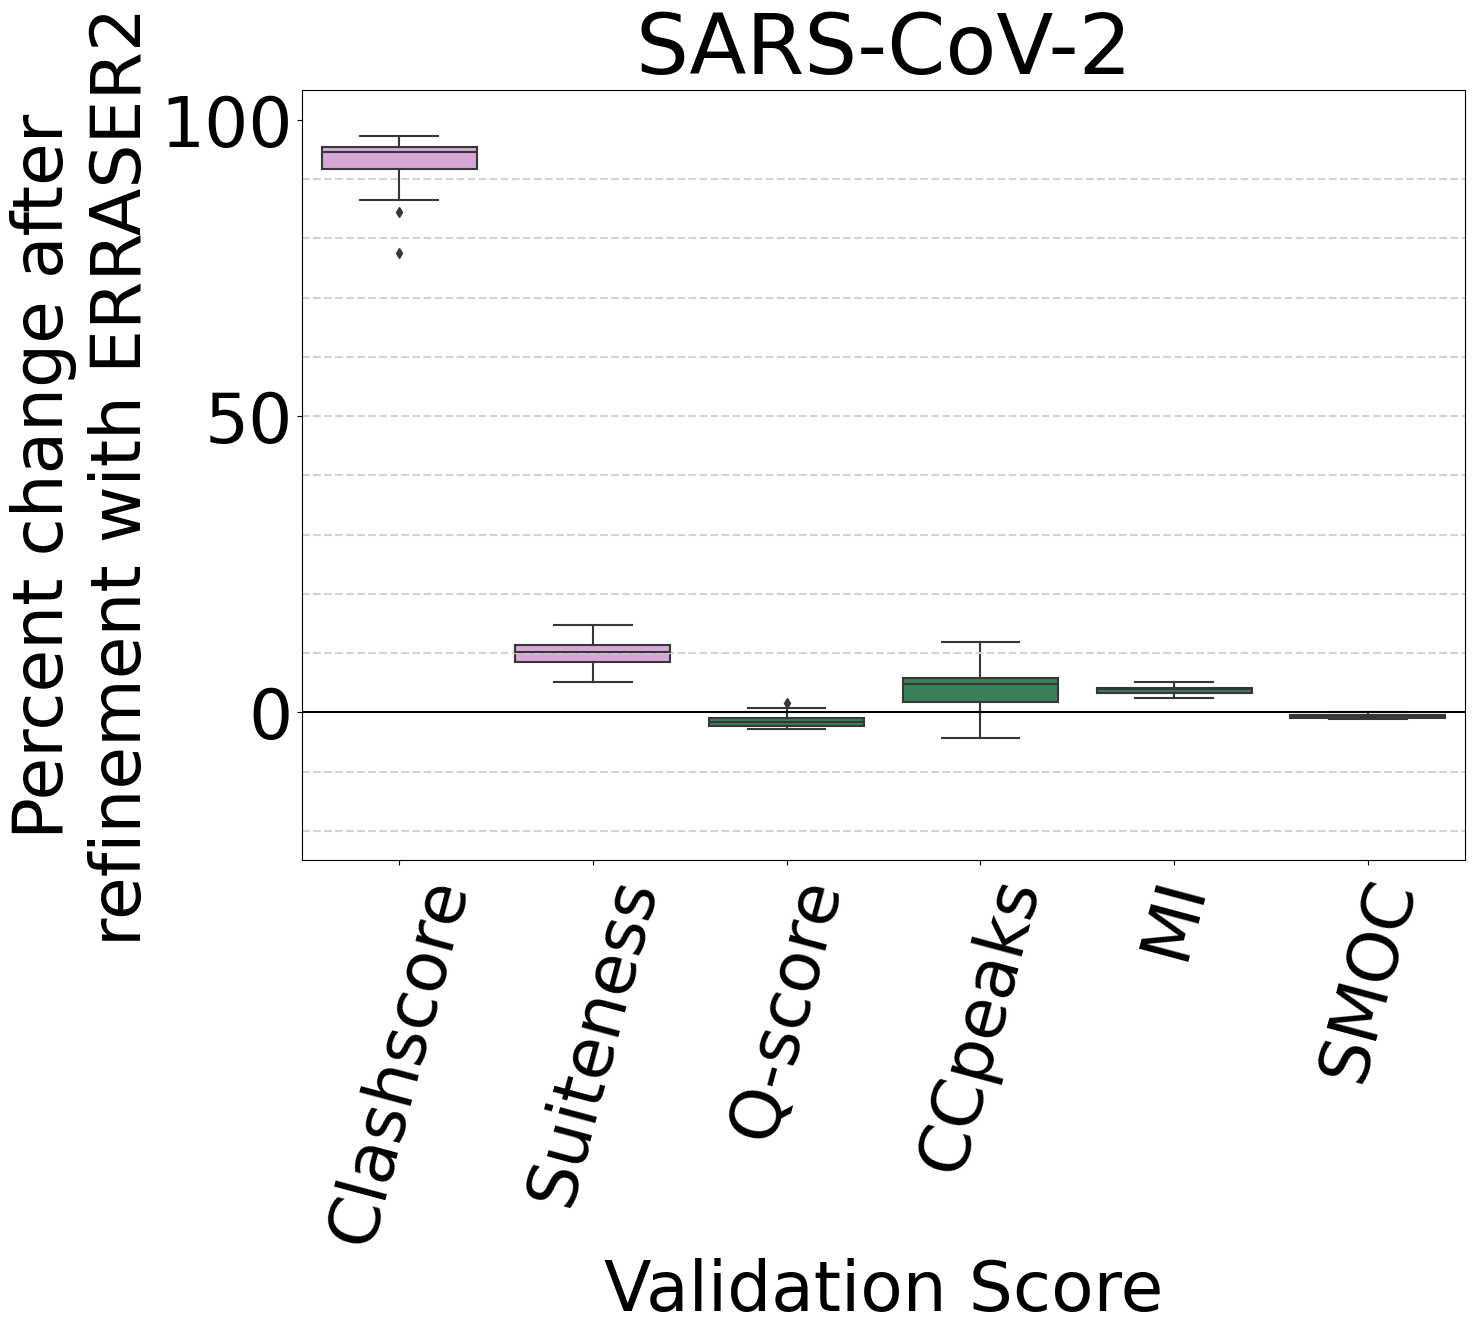

In [11]:
plt.rcParams.update({'font.size':50})
plt.rcParams['svg.fonttype'] = 'none'

def calc_percent_diff(num1, num2):
    return 100*((num2-num1)/num1)

all_scores = cat1+cat2

for species, species_group in df.groupby('species'):
    #print(species)
    for conf, conf_group in species_group.groupby('conf'):
        #print(conf)
        if conf_group.modeling_method.nunique() == 2:
            conf_erraser = conf_group.loc[conf_group['modeling_method'] == 'auto-drrafter_erraser']
            conf_auto = conf_group.loc[conf_group['modeling_method'] == 'auto-drrafter_only']

            percent_diff = []
            for score in all_scores:
                percent_diff_single_score = []
                for index,row in conf_erraser.iterrows():
                    auto_row = conf_auto.loc[conf_auto['pdb'] == row['pdb'][:-14]]
                    percent_diff_single_score.append(calc_percent_diff(auto_row.at[(auto_row.index[0]), score], 
                                                                     conf_erraser.at[index, score]))
                percent_diff.append(percent_diff_single_score)

            for idx,score in enumerate(all_scores):
                conf_erraser[score+'_percent_diff'] = percent_diff[idx]
            # conf_erraser.to_csv(f'temp_erraser_csvs/{species}_{conf}_erraser.csv')

            #now melting the dataframe so it is in the correct format and renaming the variables
            conf_erraser_melt = pd.melt(conf_erraser, id_vars = ['species', 'conf'], 
                                 value_vars=[score+'_percent_diff' for score in all_scores], 
                                 var_name = 'score_type', value_name='percent_difference')
            conf_erraser_melt['score_type'] = [score[:-13] for score in conf_erraser_melt['score_type']]
            #print(conf_erraser_melt)

            #now making clashscores positive
            percent_diff_relative = []
            for index,row in conf_erraser_melt.iterrows():
                if row['score_type'] == 'clashscore':
                    percent_diff_relative.append(abs(conf_erraser_melt.at[index,'percent_difference']))
                else:
                    percent_diff_relative.append(conf_erraser_melt.at[index,'percent_difference'])
            conf_erraser_melt['percent_difference2'] = percent_diff_relative
            
            new_names = []
            for index,row in conf_erraser_melt.iterrows():
                if row['score_type'] == 'clashscore':
                    new_names.append('Clashscore')
                elif row['score_type'] == 'avg_suitness':
                    new_names.append('Suiteness')
                elif row['score_type'] == 'q':
                    new_names.append('Q-score')
                elif row['score_type'] == 'cc_peaks':
                    new_names.append('CCpeaks')
                elif row['score_type'] == 'tempy_mi':
                    new_names.append('MI')
                elif row['score_type'] == 'tempy_smoc':
                    new_names.append('SMOC')

            conf_erraser_melt['plot_labels'] = new_names
            # conf_erraser_melt.to_csv(f'temp_erraser_csvs/{species}_{conf}_erraser_melt.csv')
            # conf_auto.to_csv(f'temp_erraser_csvs/{species}_{conf}_autodrrafter_only.csv')

            #now plotting the figures
            #fig, axes = plt.subplots()
            plt.figure(figsize=(15, 10))
            if conf != 'nan':
                if conf == 'conf1':
                    plt.title(species+' Conformation 1')
                elif conf == 'conf2':
                    plt.title(species+' Conformation 2')
                elif conf == 'conf3':
                    plt.title(species+' Conformation 3')
                elif conf == 'conf4':
                    plt.title(species+' Conformation 4')
                else:
                    plt.title(species+' '+conf)
            else:
                plt.title(species)
            ax = sns.boxplot(data=conf_erraser_melt, x='plot_labels', y='percent_difference2', 
                             palette={'Clashscore':'plum', 'Suiteness':'plum', 'Q-score':'seagreen', 
                                      'CCpeaks':'seagreen', 
                                      'MI':'seagreen', 'SMOC':'seagreen'})
            plt.ylabel('Percent change after\nrefinement with ERRASER2')
            plt.xlabel('Validation Score')
            plt.axhline(y=0, color='black')
            plt.xticks(rotation=75)
            x = [-20, -10, 10, 20, 30, 40, 50, 60, 70, 80, 90]
            for num in x:
                plt.axhline(y=num, color='lightgray', linestyle='--')
            ax.set_ylim(bottom=-25, 
                        top=105)

            plt.savefig(f'erraser_figures/{species}_{conf}_percdiff.svg', format='svg')
            plt.show()

## Raw score plots

In [12]:
#idea is to have separate plots for each score type 
#y axis is score type, x axis is different maps, with before and after erraser in different hues 
scores_for_stripplots = ['clashscore', 'avg_suitness', 'q', 'cc_peaks', 'tempy_mi', 'tempy_smoc', 'cc_volume', 
                         'cc_mask']
df_melt = pd.melt(df, id_vars=['emmap', 'species', 'conf', 'modeling_method'], 
                  value_vars=scores_for_stripplots,
                  var_name = 'score_type', value_name='score')
map_names = []
for i in range(len(df_melt)):
    if df_melt['conf'][i] == 'nan':
        map_names.append(df_melt['species'][i])
    elif df_melt['conf'][i] == 'conf1':
        map_names.append(df_melt['species'][i]+' Conformation 1')
    elif df_melt['conf'][i] == 'conf2':
        map_names.append(df_melt['species'][i]+' Conformation 2')
    elif df_melt['conf'][i] == 'conf3':
        map_names.append(df_melt['species'][i]+' Conformation 3')
    elif df_melt['conf'][i] == 'conf4':
        map_names.append(df_melt['species'][i]+' Conformation 4')
    else:
        map_names.append(df_melt['species'][i]+' '+df_melt['conf'][i])

df_melt['map'] = map_names
df_melt = df_melt.loc[df_melt['map'] != 'HCoV-229E node1']
df_melt = df_melt.loc[df_melt['map'] != 'HCoV-229E node7']

cat1 = ['clashscore', 'avg_suitness']
cat2 = ['q', 'cc_peaks', 'tempy_mi', 'tempy_smoc', 'cc_volume', 'cc_mask']

new_names = []
for index,row in df_melt.iterrows():
    if row['score_type'] == 'clashscore':
        new_names.append('Clashscore')
    elif row['score_type'] == 'avg_suitness':
        new_names.append('Suiteness')
    elif row['score_type'] == 'q':
        new_names.append('Q-score')
    elif row['score_type'] == 'cc_peaks':
        new_names.append('CCpeaks')
    elif row['score_type'] == 'tempy_mi':
        new_names.append('MI')
    elif row['score_type'] == 'tempy_smoc':
        new_names.append('SMOC')
    elif row['score_type'] == 'cc_volume':
        new_names.append('CCvolume')
    elif row['score_type'] == 'cc_mask':
        new_names.append('CCmask')

df_melt['plot_labels'] = new_names

df_melt.head()

emmap     species   conf  \
0  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...  BtCoV-HKU5  conf4   
1  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...  BtCoV-HKU5  conf4   
2  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...  BtCoV-HKU5  conf4   
3  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...  BtCoV-HKU5  conf4   
4  BtCoV_HKU5_con4-7p29-cryosparc_P2_J371_map_sha...  BtCoV-HKU5  conf4   

      modeling_method  score_type  score                        map  \
0  auto-drrafter_only  clashscore   8.56  BtCoV-HKU5 Conformation 4   
1  auto-drrafter_only  clashscore   6.71  BtCoV-HKU5 Conformation 4   
2  auto-drrafter_only  clashscore   9.72  BtCoV-HKU5 Conformation 4   
3  auto-drrafter_only  clashscore   5.09  BtCoV-HKU5 Conformation 4   
4  auto-drrafter_only  clashscore   5.09  BtCoV-HKU5 Conformation 4   

  plot_labels  
0  Clashscore  
1  Clashscore  
2  Clashscore  
3  Clashscore  
4  Clashscore

In [13]:
modeling = []

for index,row in df_melt.iterrows():
    if row['modeling_method'] == 'auto-drrafter_only':
        modeling.append('Auto-DRRAFTER only')
    else:
        modeling.append('Auto-DRRAFTER with ERRASER2')

df_melt['modeling'] = modeling

df1 = df_melt.loc[df_melt['score_type'].isin(cat1)]
df2 = df_melt.loc[df_melt['score_type'].isin(cat2)]    

plot_order = ['SARS-CoV-2', 'SARS-CoV-2 SL56', 'SARS-CoV-2 SL56-5bext', 'SARS-CoV-2 SL56-5cext', 
              'SARS-CoV-1', 'MERS Conformation 1', 'MERS Conformation 2', 'MERS Conformation 3', 
              'BtCoV-HKU5 Conformation 1', 'BtCoV-HKU5 Conformation 2', 'BtCoV-HKU5 Conformation 3', 
              'BtCoV-HKU5 Conformation 4', 'HCoV-229E']


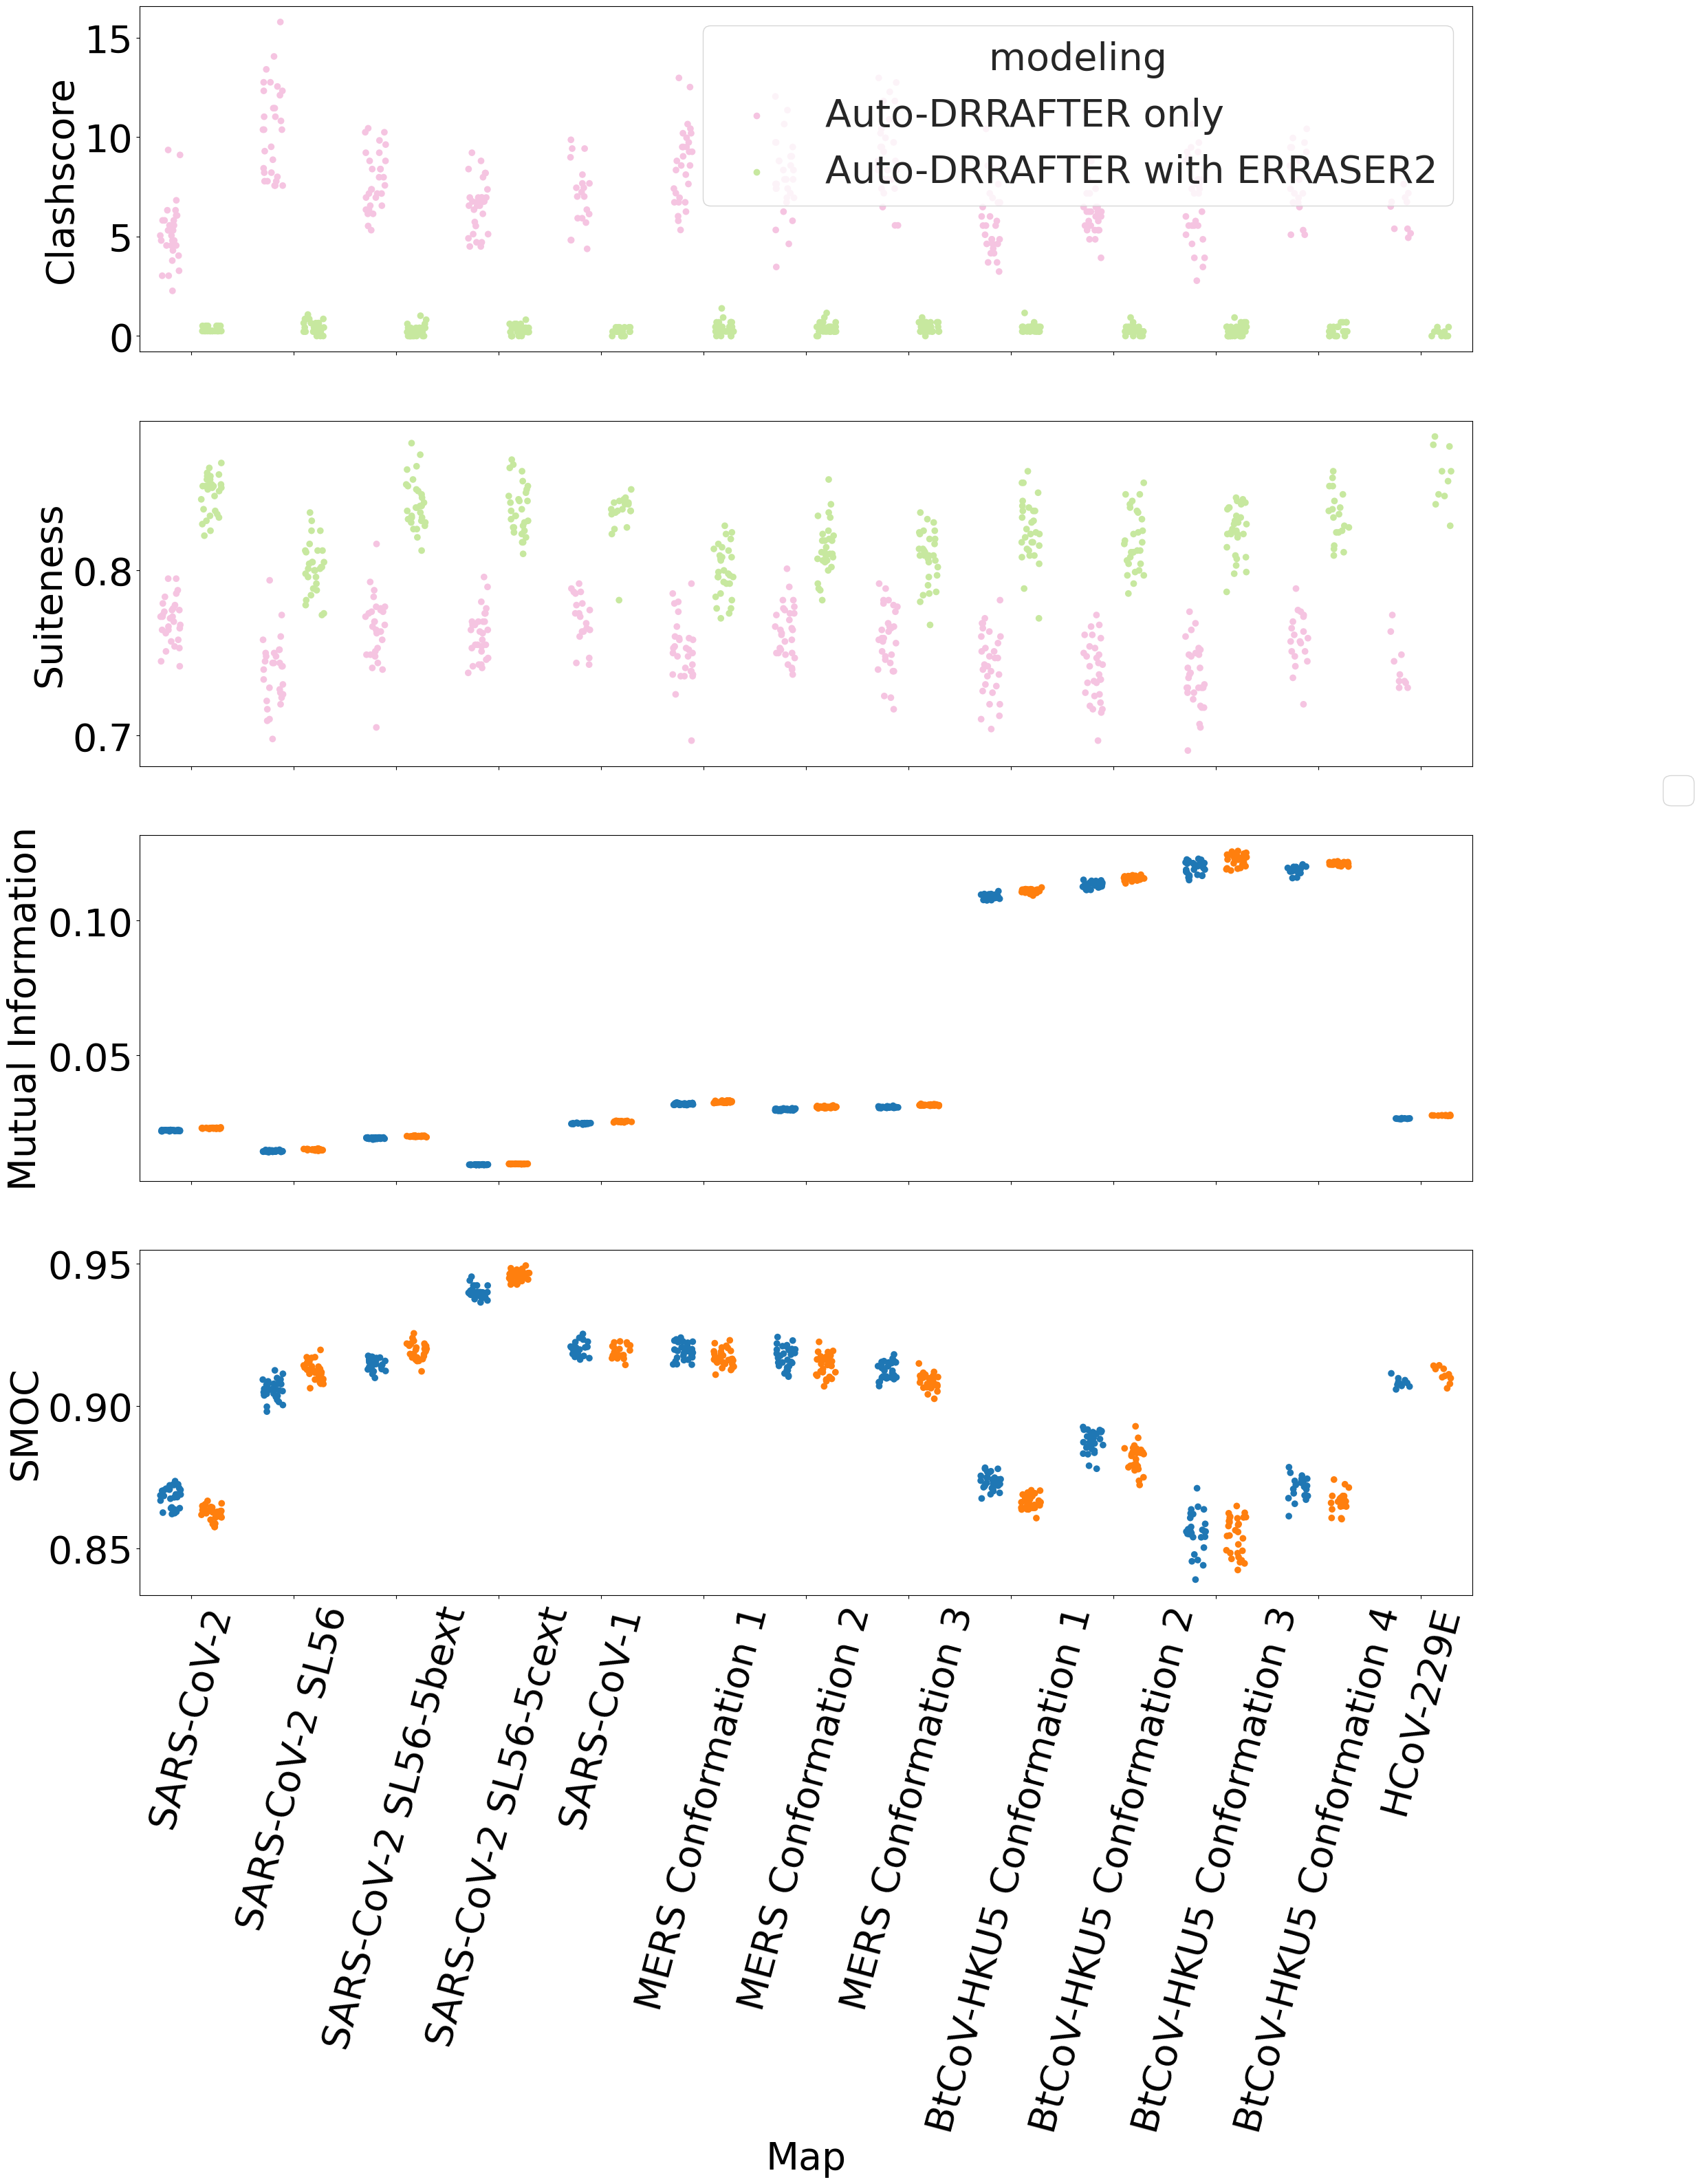

In [14]:
plt.rcParams.update({'font.size':40})

fig, axes =plt.subplots(4,1,sharex=True, figsize=(25,30))
sns.set_style('whitegrid')
g1 = sns.stripplot(ax=axes[0], data=df_melt.loc[df_melt['plot_labels']=='Clashscore'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, palette='PiYG')
axes[0].set_ylabel('Clashscore')
#handles1,labels1=axes[0].get_legend_handles_labels()
#axes[0].legend(loc='center left', bbox_to_anchor=(1,0.5), markerscale=1)
g2 = sns.stripplot(ax=axes[1], data=df_melt.loc[df_melt['plot_labels']=='Suiteness'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, palette='PiYG', legend=False)
axes[1].set_ylabel('Suiteness')
g3 = sns.stripplot(ax=axes[2], data=df_melt.loc[df_melt['plot_labels']=='MI'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, legend=False)
axes[2].set_ylabel('Mutual Information')
g4 = sns.stripplot(ax=axes[3], data=df_melt.loc[df_melt['plot_labels']=='SMOC'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, legend=False)
axes[3].set_ylabel('SMOC')
handles,labels=ax.get_legend_handles_labels()
fig.legend(handles,labels,loc='center left', bbox_to_anchor=(1,0.5), markerscale=1)

#legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=3)
plt.xlabel('Map')
plt.xticks(rotation=75)
plt.savefig(f'erraser_figures/Clashscore_Suiteness_MI_SMOC_subplots.svg', format='svg', bbox_inches='tight')
plt.show();

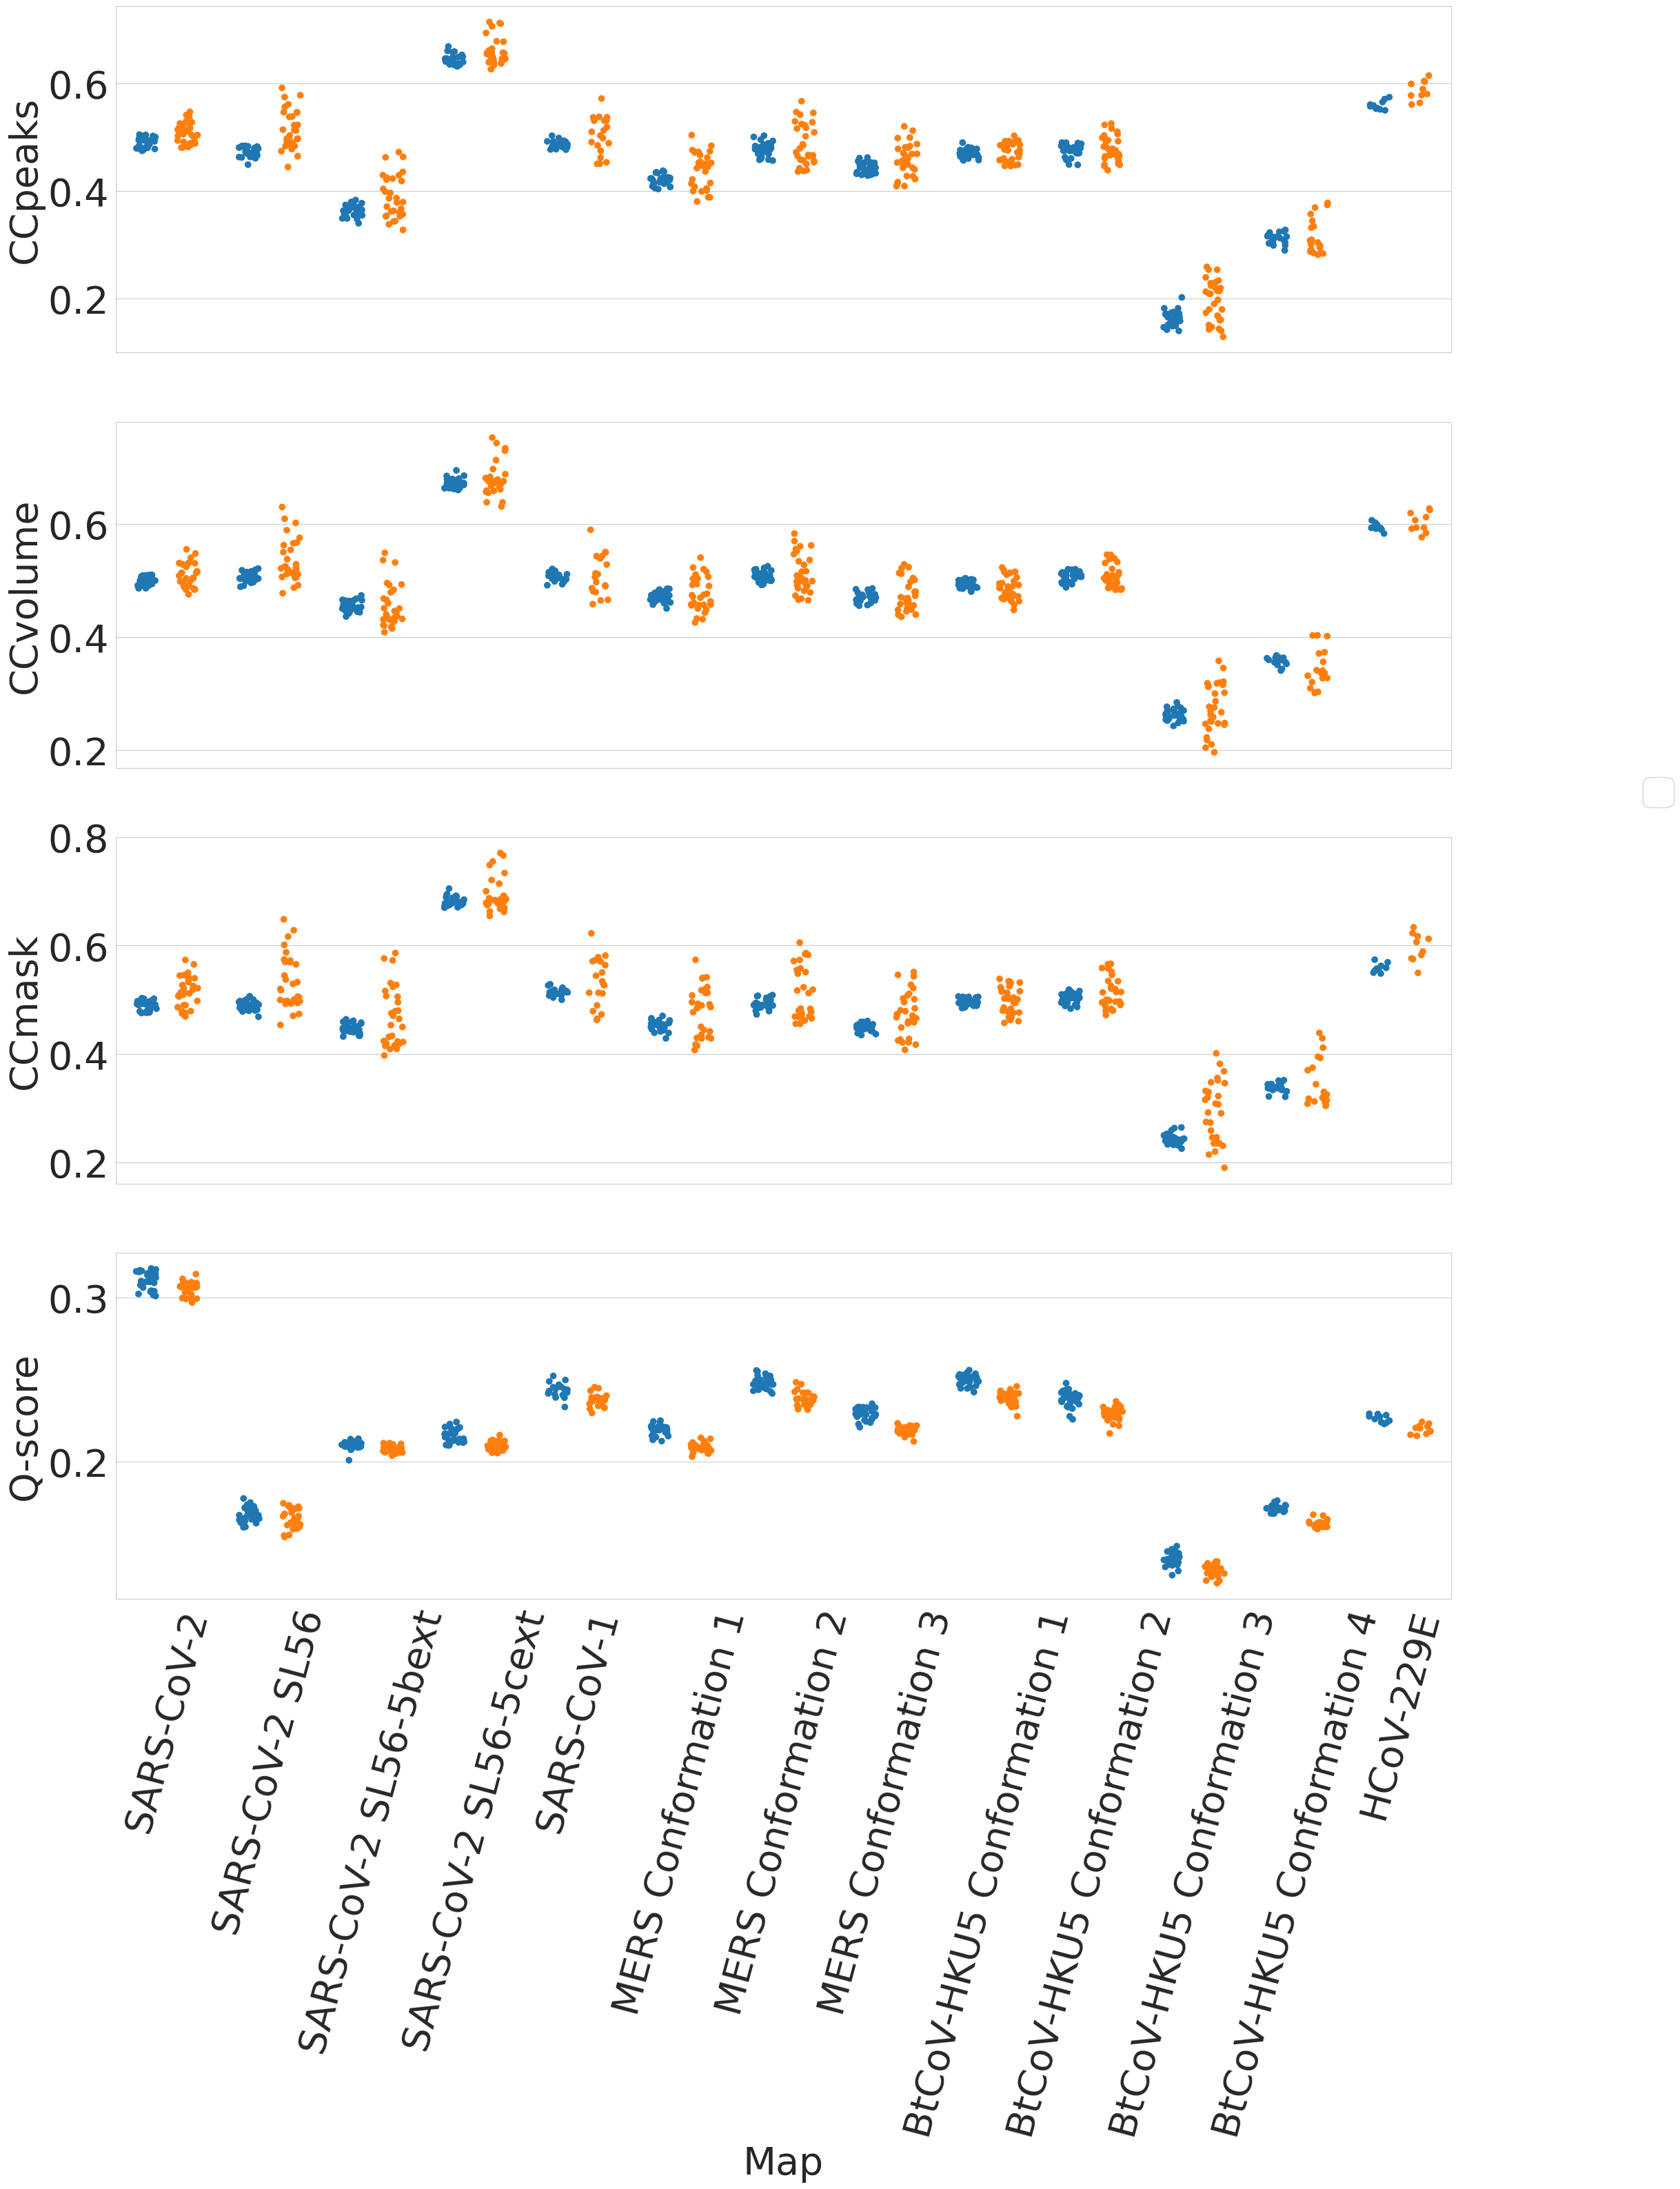

In [15]:
plt.rcParams.update({'font.size':40})

fig, axes =plt.subplots(4,1,sharex=True, figsize=(25,30))
sns.set_style('whitegrid')
g1 = sns.stripplot(ax=axes[0], data=df_melt.loc[df_melt['plot_labels']=='CCpeaks'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, legend=False)
axes[0].set_ylabel('CCpeaks')
#handles1,labels1=axes[0].get_legend_handles_labels()
#axes[0].legend(loc='center left', bbox_to_anchor=(1,0.5), markerscale=1)
g2 = sns.stripplot(ax=axes[1], data=df_melt.loc[df_melt['plot_labels']=='CCvolume'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, legend=False)
axes[1].set_ylabel('CCvolume')
g3 = sns.stripplot(ax=axes[2], data=df_melt.loc[df_melt['plot_labels']=='CCmask'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, legend=False)
axes[2].set_ylabel('CCmask')
g4 = sns.stripplot(ax=axes[3], data=df_melt.loc[df_melt['plot_labels']=='Q-score'], x='map', y='score', 
              hue='modeling', size=7, jitter=0.2, dodge=True, order=plot_order, legend=False)
axes[3].set_ylabel('Q-score')
handles,labels=ax.get_legend_handles_labels()
fig.legend(handles,labels,loc='center left', bbox_to_anchor=(1,0.5), markerscale=1)

#legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=3)
plt.xlabel('Map')
plt.xticks(rotation=75)
plt.savefig(f'erraser_figures/ccpeaks_ccvolume_ccmask_qscore_subplots.svg', format='svg', bbox_inches='tight')
plt.show()